In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_06 = np.genfromtxt('../dataset2/motion_06.csv', delimiter=',')
print("Motion 0.6 data has a length of ", len(motion_06))

Motion 0.6 data has a length of  133691


## Visualizations

In [6]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [7]:
"""
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]
"""

def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(dataset):
        if np.isclose(item[2], fwd, 0.01) and np.isclose(item[3], side, 0.01) and np.isclose(item[4], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [8]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_06

In [9]:
velocity = 0.611591

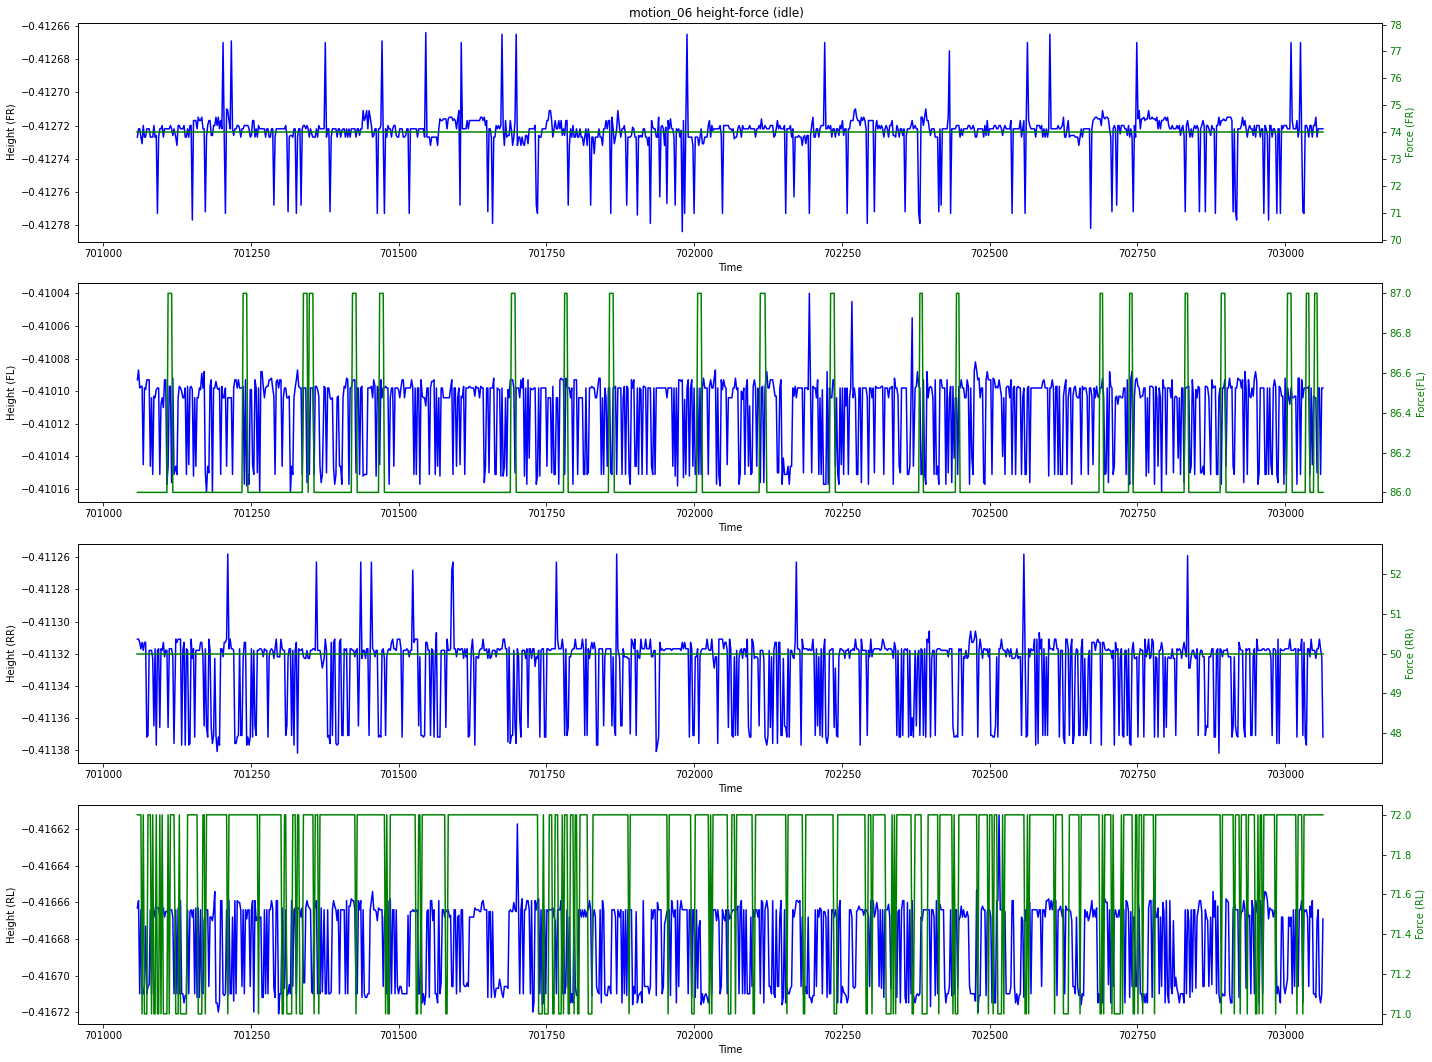

In [10]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_06 height-force (idle)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

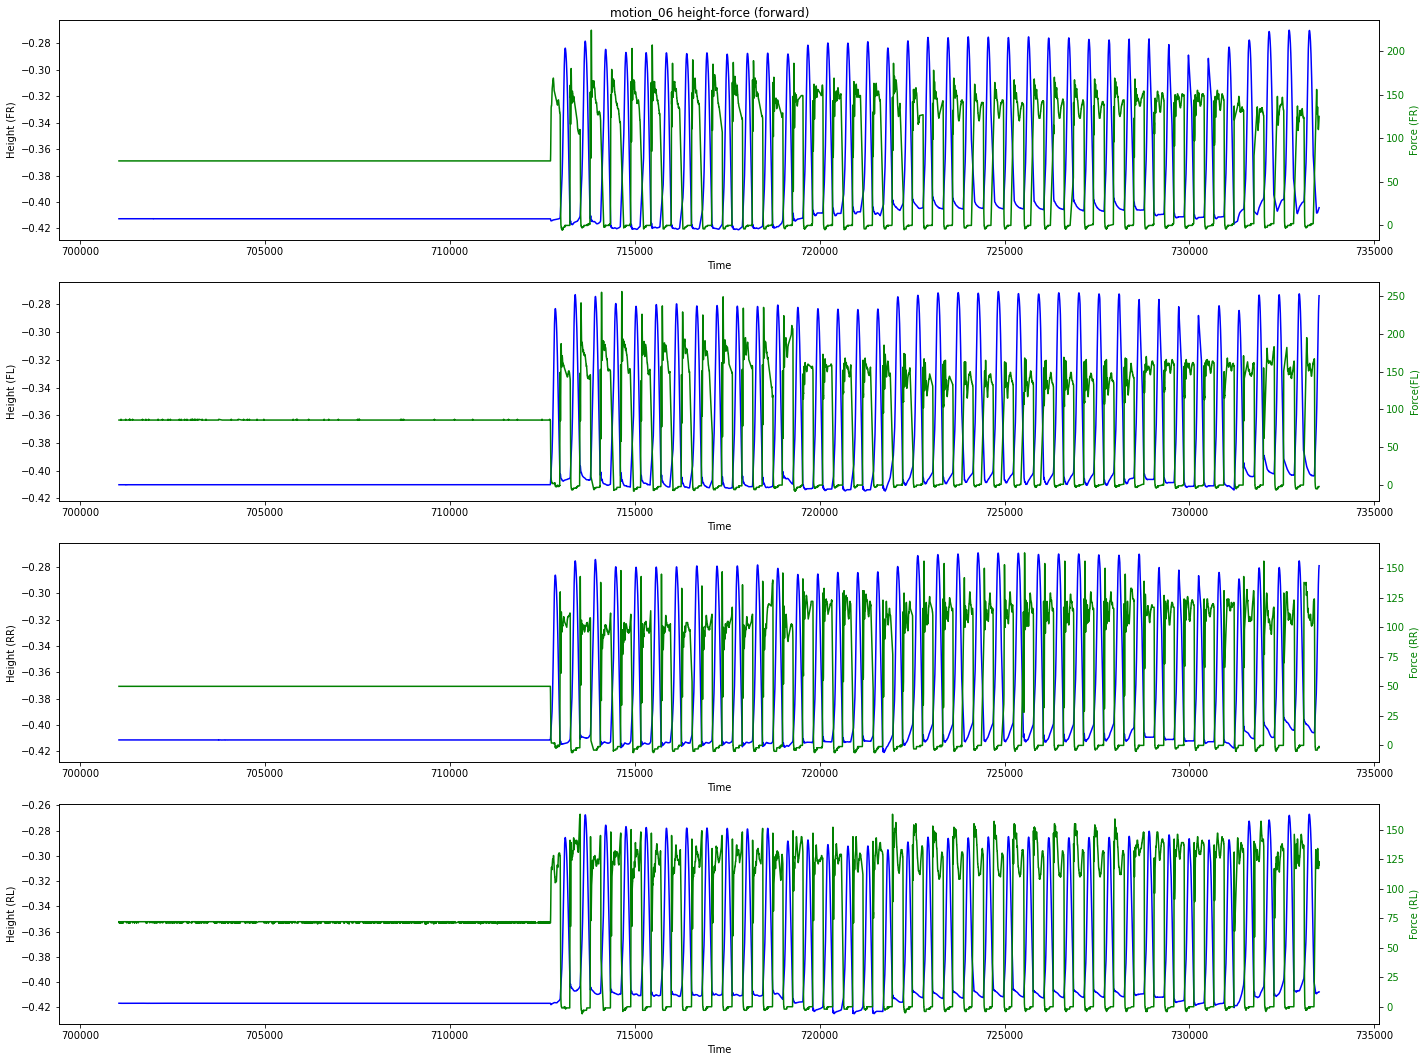

In [11]:
# Forward
fwd_cmds = get_specific_cmd(motion_06, velocity, 0, 0)
motion_06_fwd = motion_06[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_06 height-force (forward)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

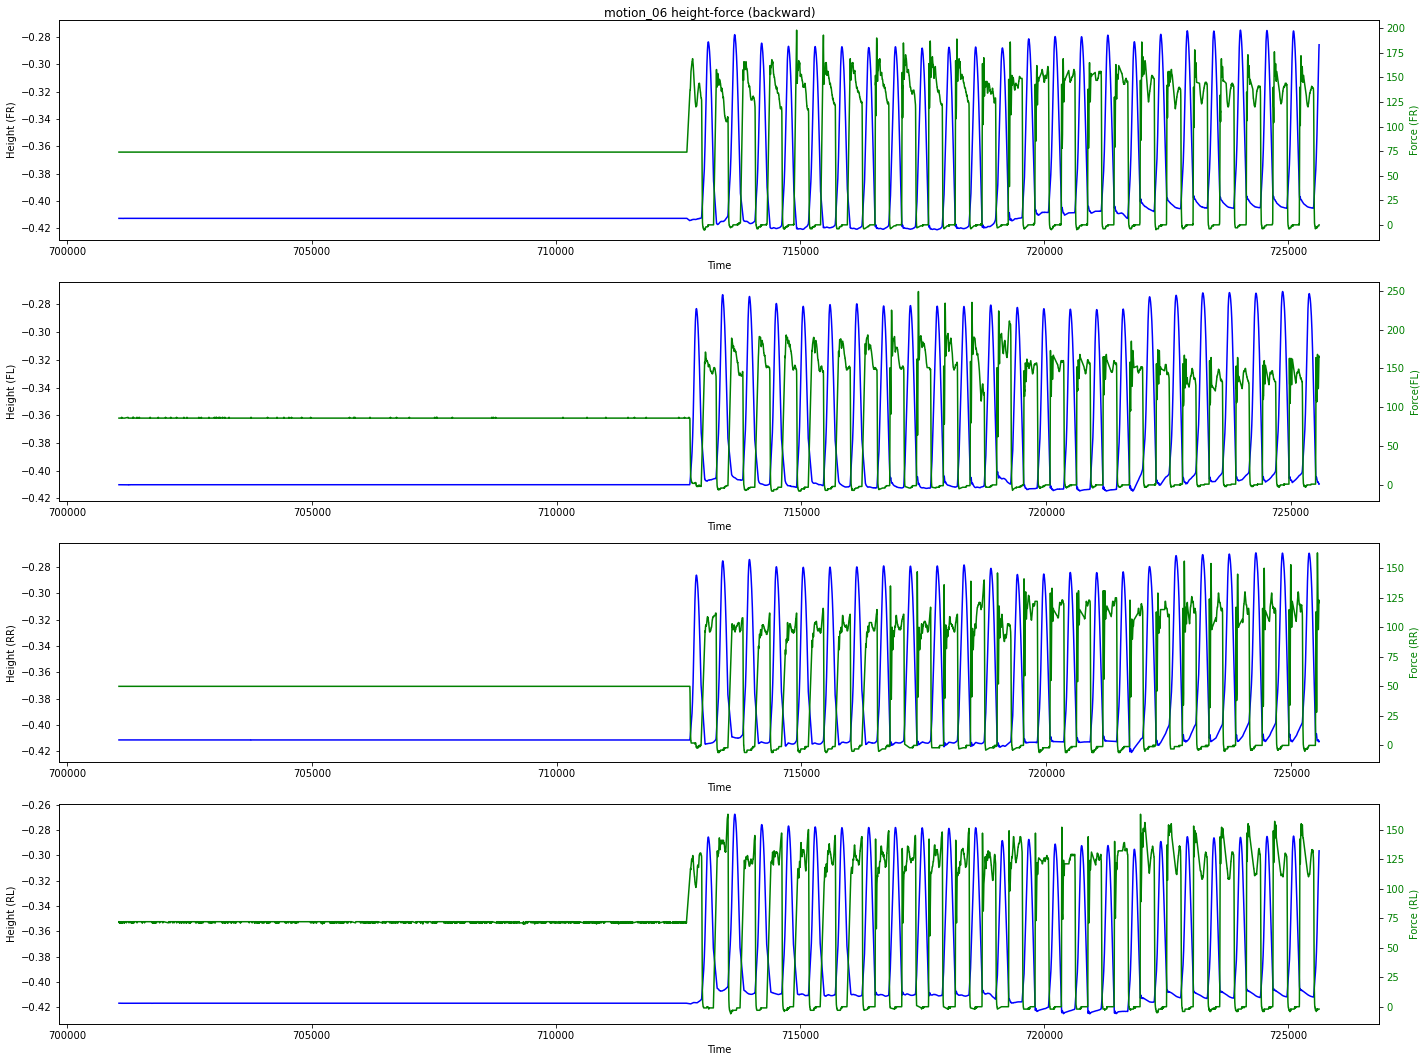

In [12]:
# Backwards
bwd_cmds = get_specific_cmd(motion_06, -velocity, 0, 0)
motion_06_bwd = motion_06[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_06 height-force (backward)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

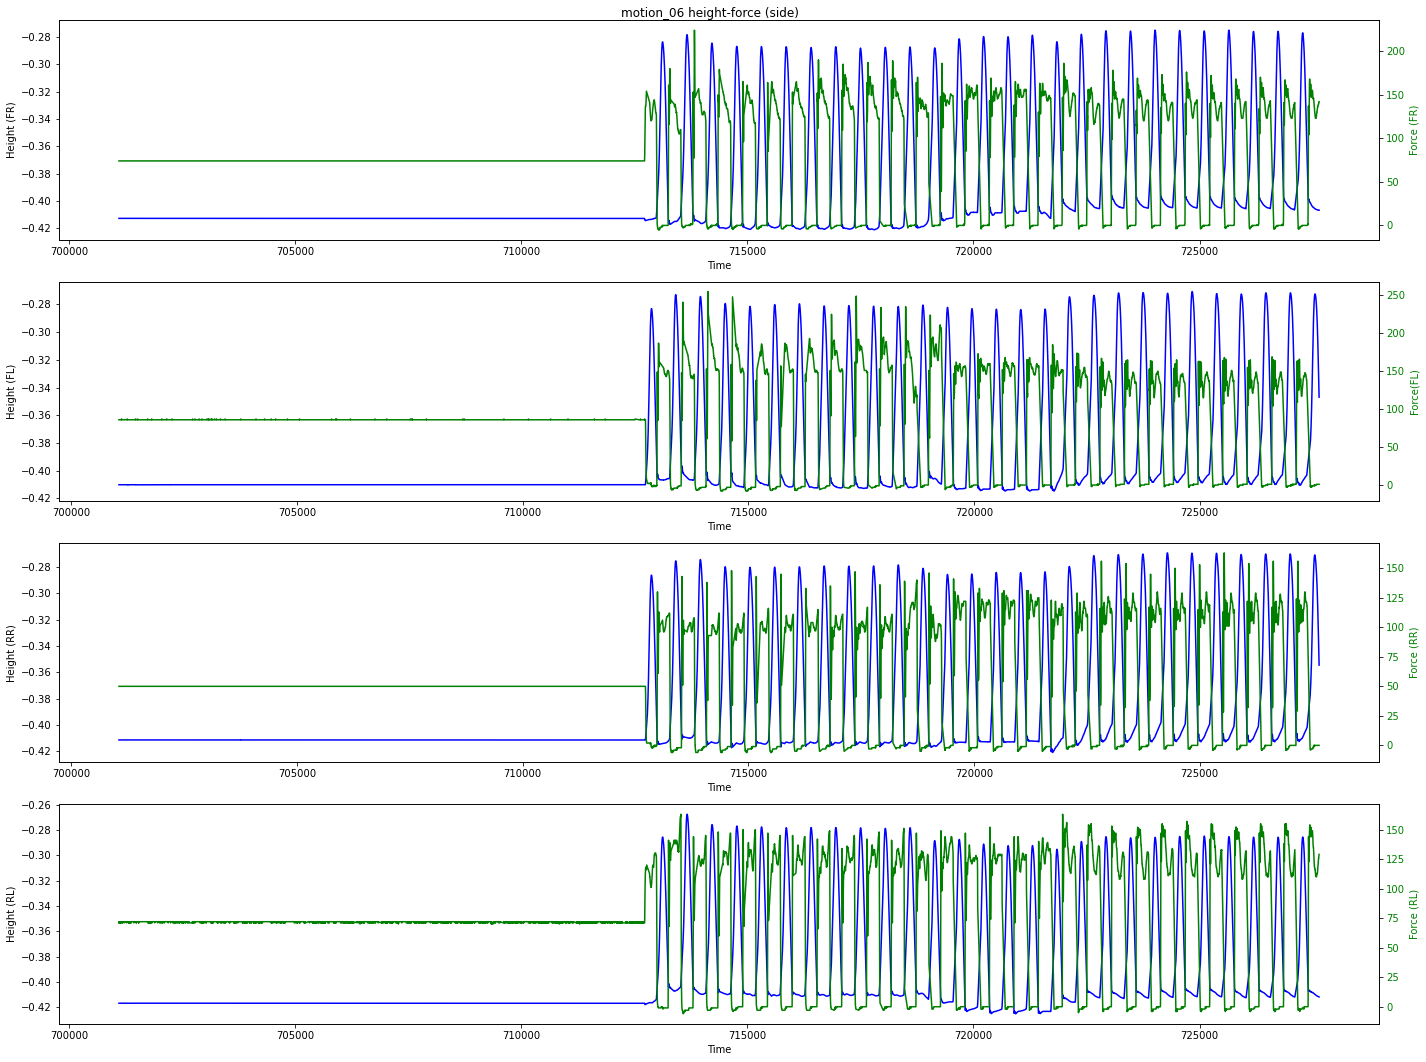

In [13]:
# Side (right)
side_cmds = get_specific_cmd(motion_06, 0, velocity, 0)
motion_06_side = motion_06[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_06 height-force (side)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

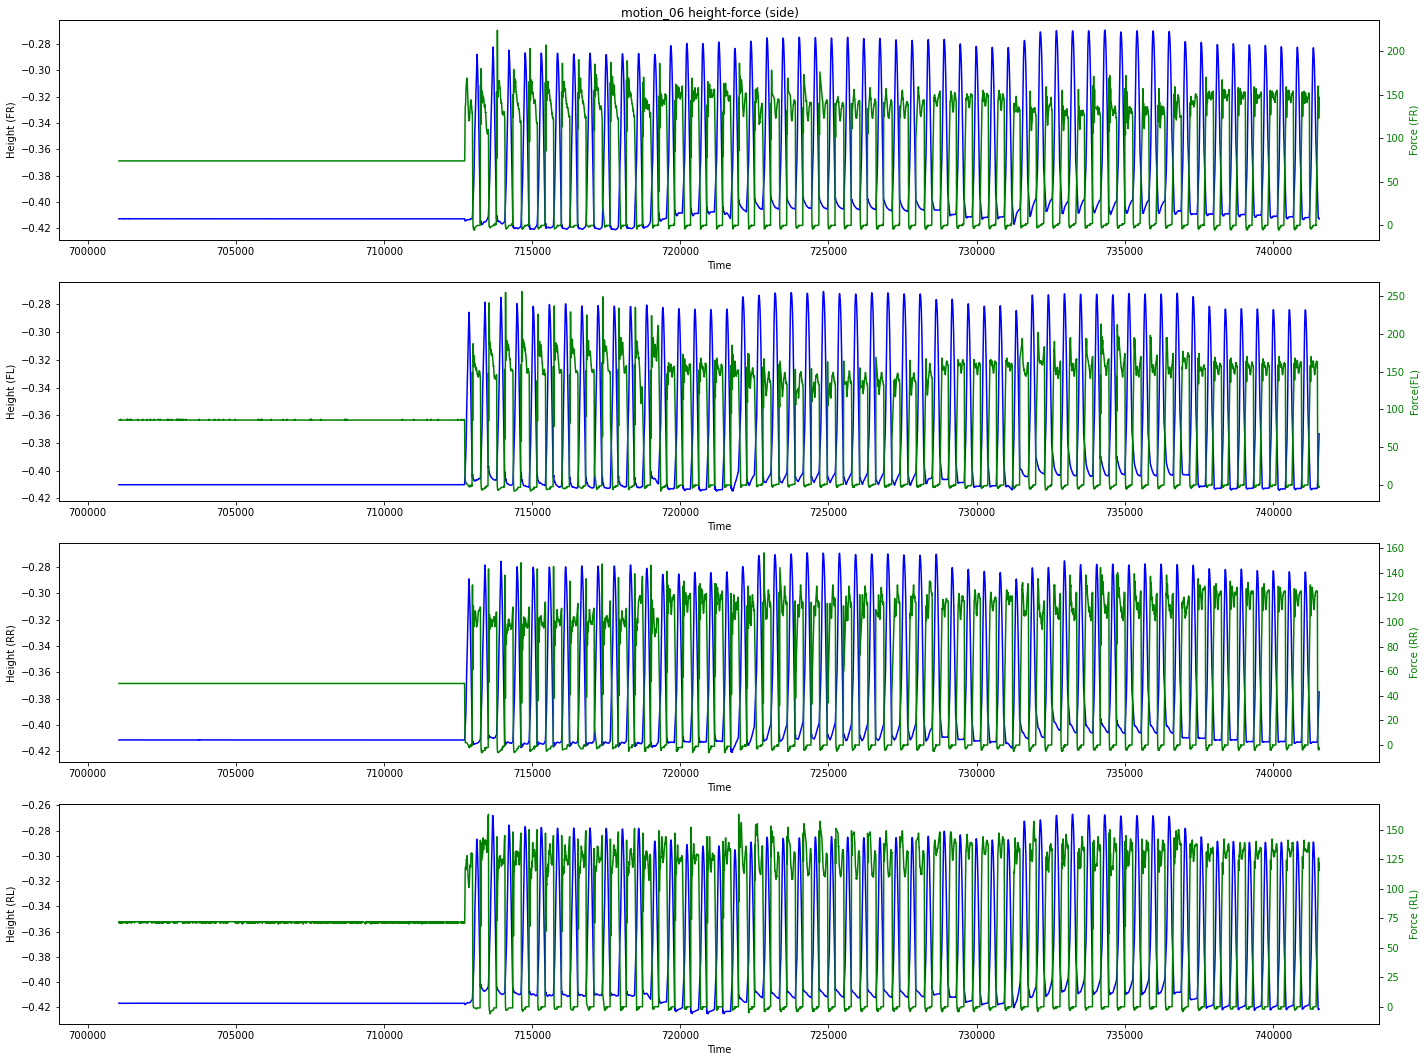

In [14]:
# Side (left)
side_cmds = get_specific_cmd(motion_06, 0, -velocity, 0)
motion_06_side = motion_06[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_06 height-force (side)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

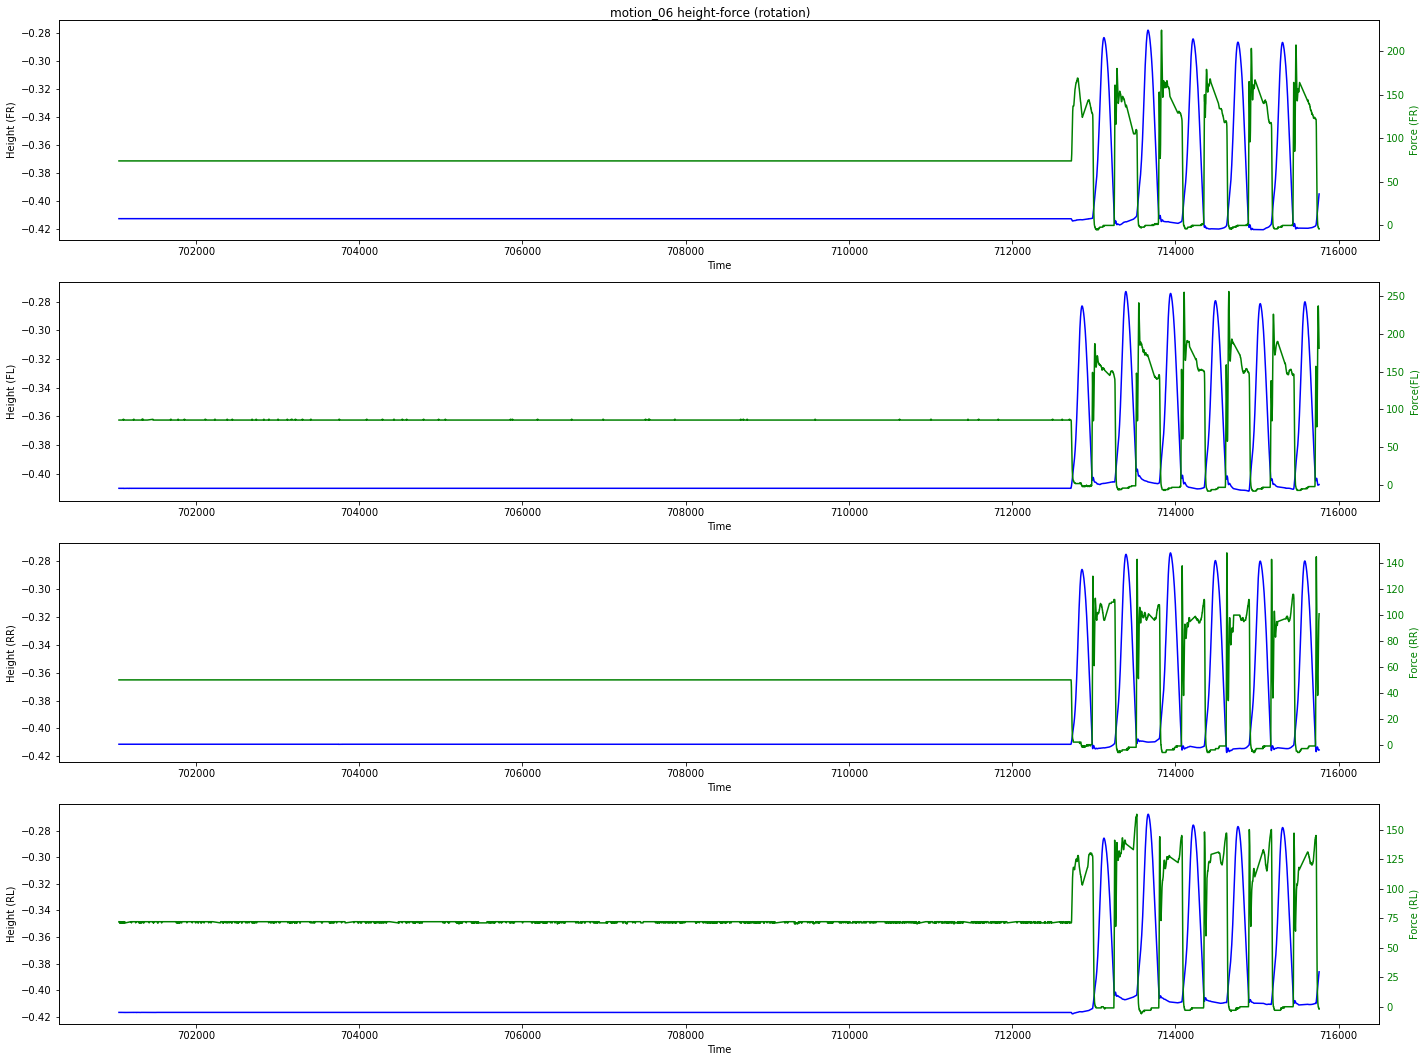

In [15]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_06, 0, 0, velocity)
motion_06_rot = motion_06[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_06 height-force (rotation)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

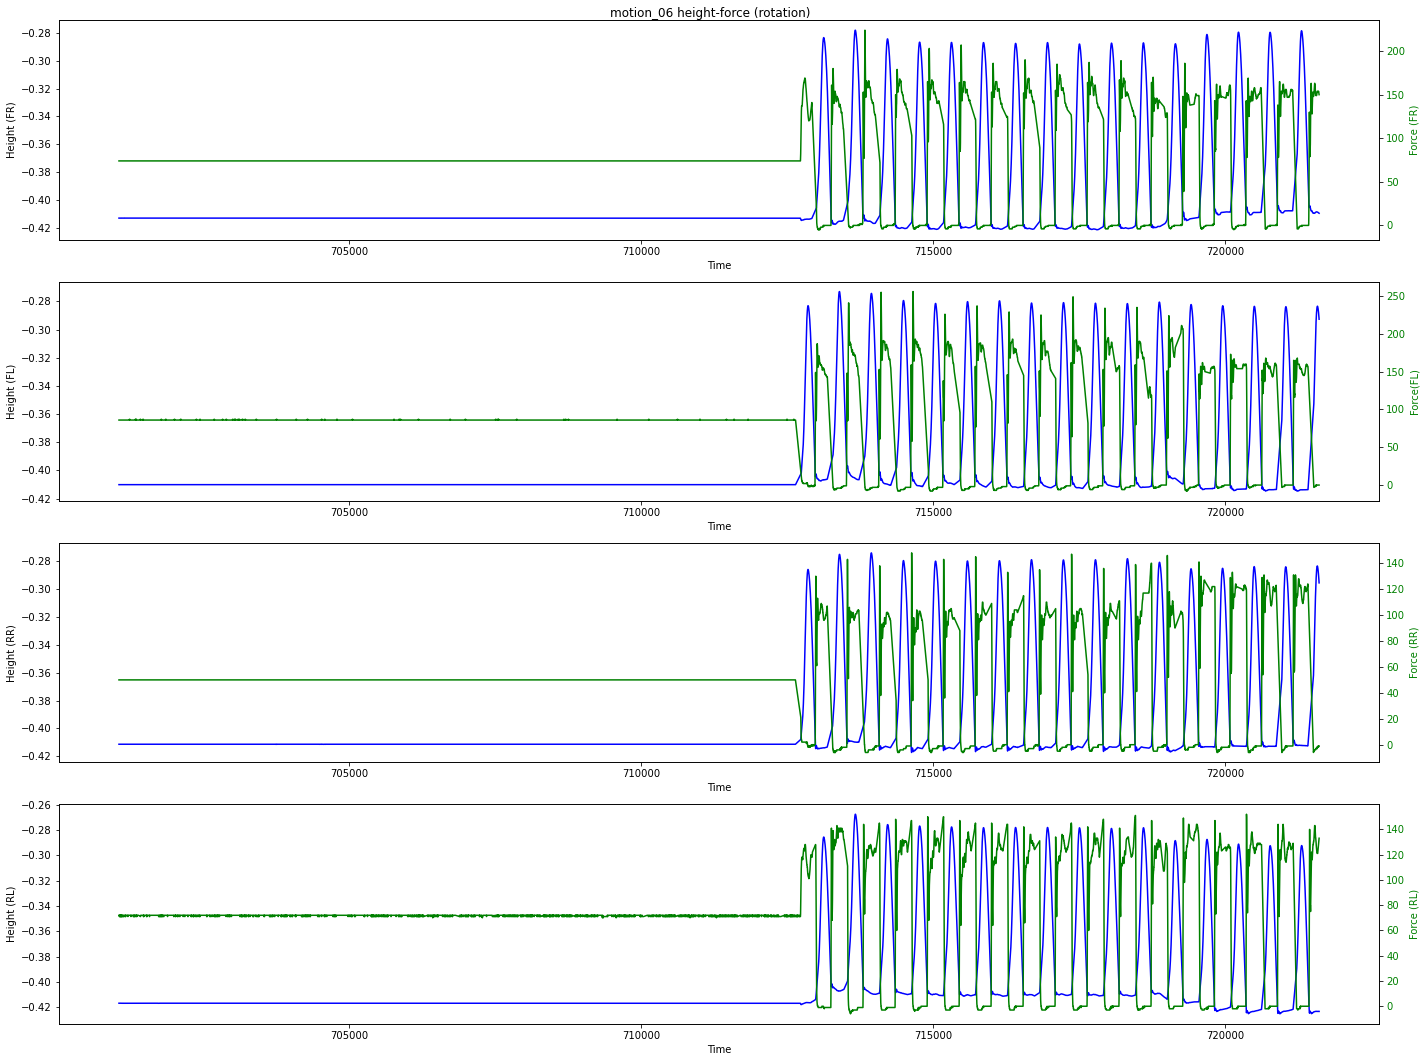

In [16]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_06, 0, 0, -velocity)
motion_06_rot = motion_06[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_06_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_06 height-force (rotation)",
                      motion_06,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [17]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [18]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_06_cmds = motion_06[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_06_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_06_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_06_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_06_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_06_cmds[footsteps_nms(motion_06_cmds, footsteps), 0])
    
    return motion_06_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  13609 13777 14392 14914
Min and max diff between front and rear feet 0.000418 0.263169 

Amount of footsteps found with height criteria:  6785 

Intersection with motion commands:  6785 

Intersection with no motion commands:  0 

Number of force footsteps:  778 

Number of height-force footsteps:  778 

Number of footsteps extracted with height-force due to motion:  778 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  778
Footsteps after non-maximum-suppression:  124


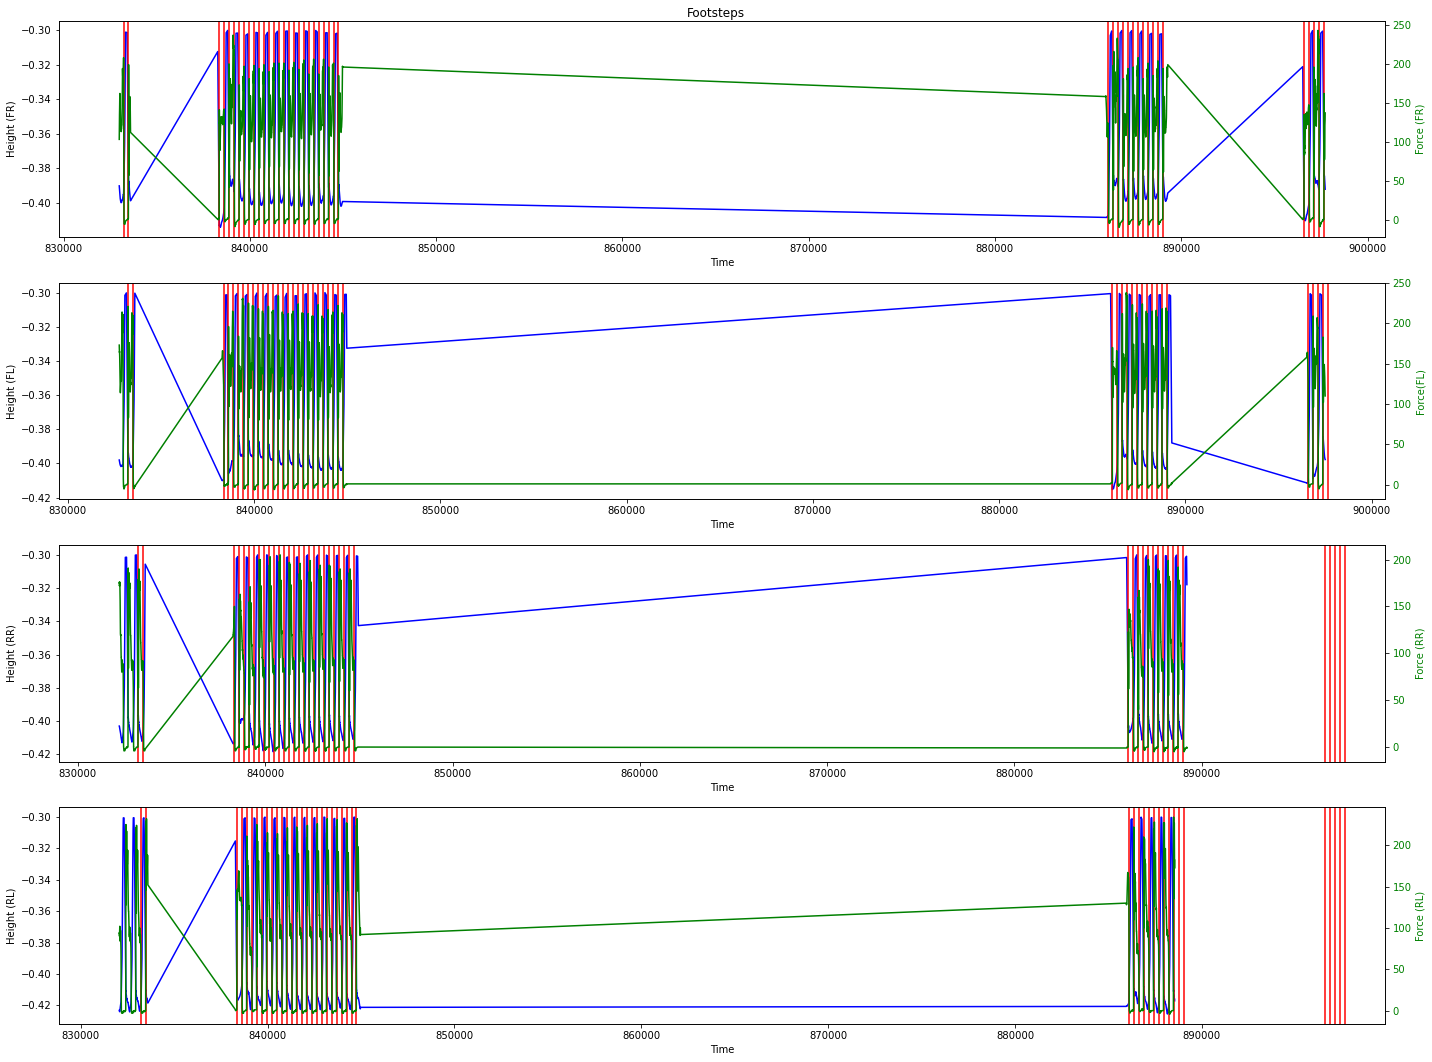

In [19]:
motion_06_fwd, footsteps_06_fwd = footstep_extraction_and_plotting(dataset=motion_06, velocities=[velocity, 0, 0], height_threshold=0.1, force_thresholds=[40,40,40,40], indexes=range(5000, 10000))

### Backward motion

Foot swinging motions lenghts:  10876 10644 10502 10475
Min and max diff between front and rear feet 0.000433 0.278799 

Amount of footsteps found with height criteria:  4897 

Intersection with motion commands:  4897 

Intersection with no motion commands:  0 

Number of force footsteps:  313 

Number of height-force footsteps:  313 

Number of footsteps extracted with height-force due to motion:  313 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  313
Footsteps after non-maximum-suppression:  90


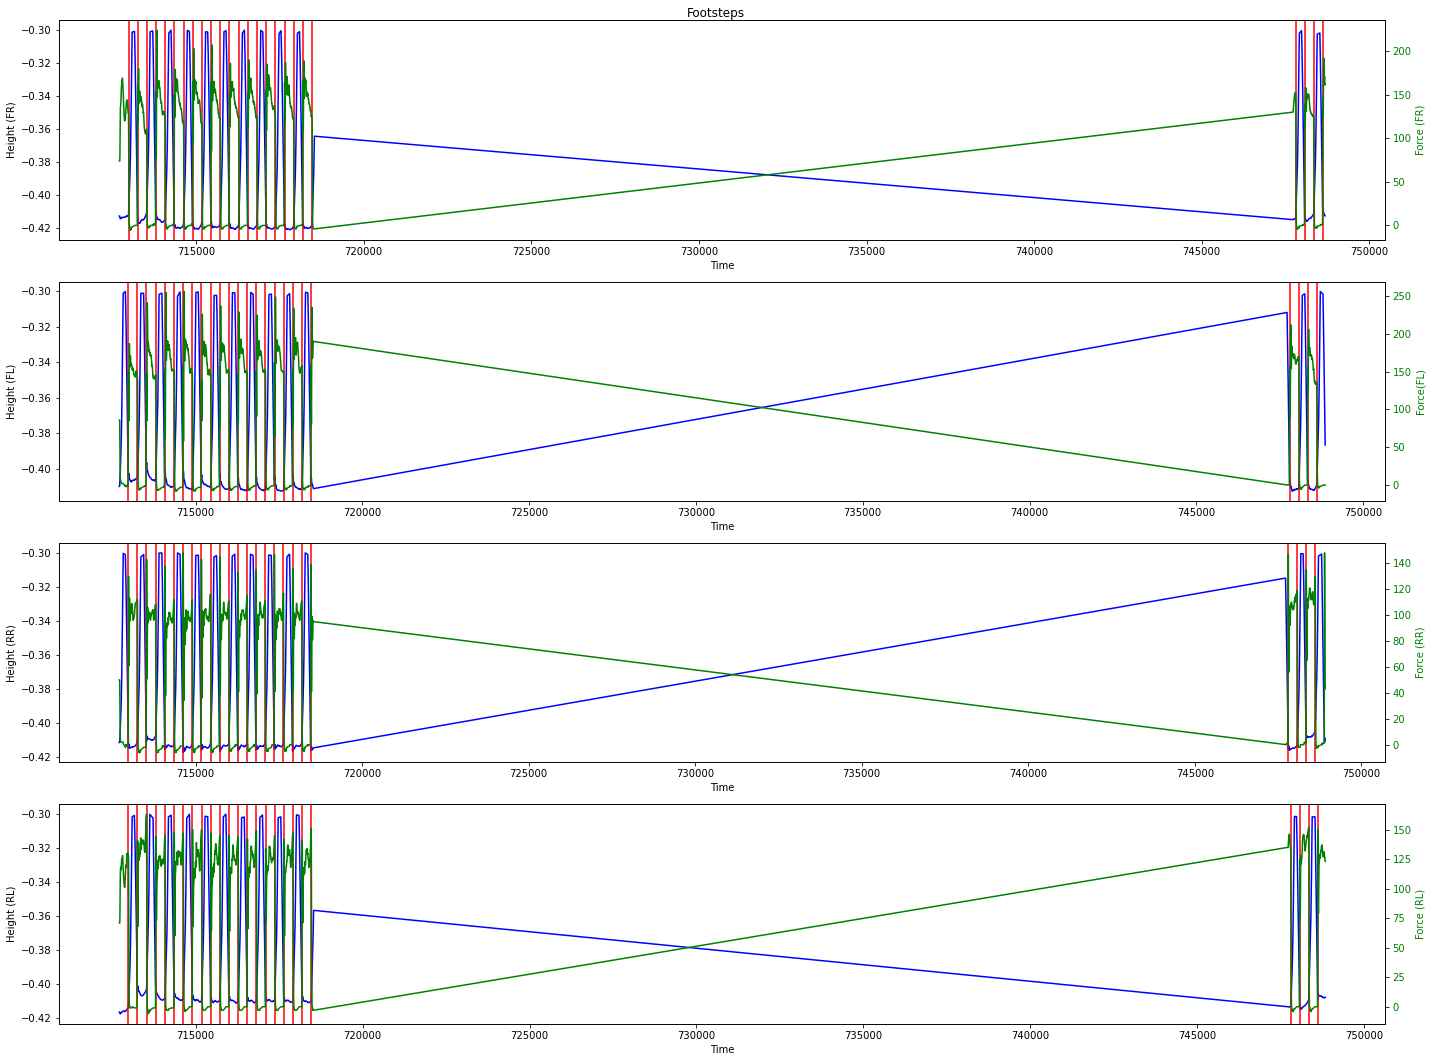

In [20]:
motion_06_bwd, footsteps_06_bwd = footstep_extraction_and_plotting(dataset=motion_06, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 3000))

### Side motion (right)

Foot swinging motions lenghts:  11518 11295 11700 11722
Min and max diff between front and rear feet 0.001498 0.267 

Amount of footsteps found with height criteria:  5378 

Intersection with motion commands:  5378 

Intersection with no motion commands:  0 

Number of force footsteps:  372 

Number of height-force footsteps:  372 

Number of footsteps extracted with height-force due to motion:  372 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  372
Footsteps after non-maximum-suppression:  100


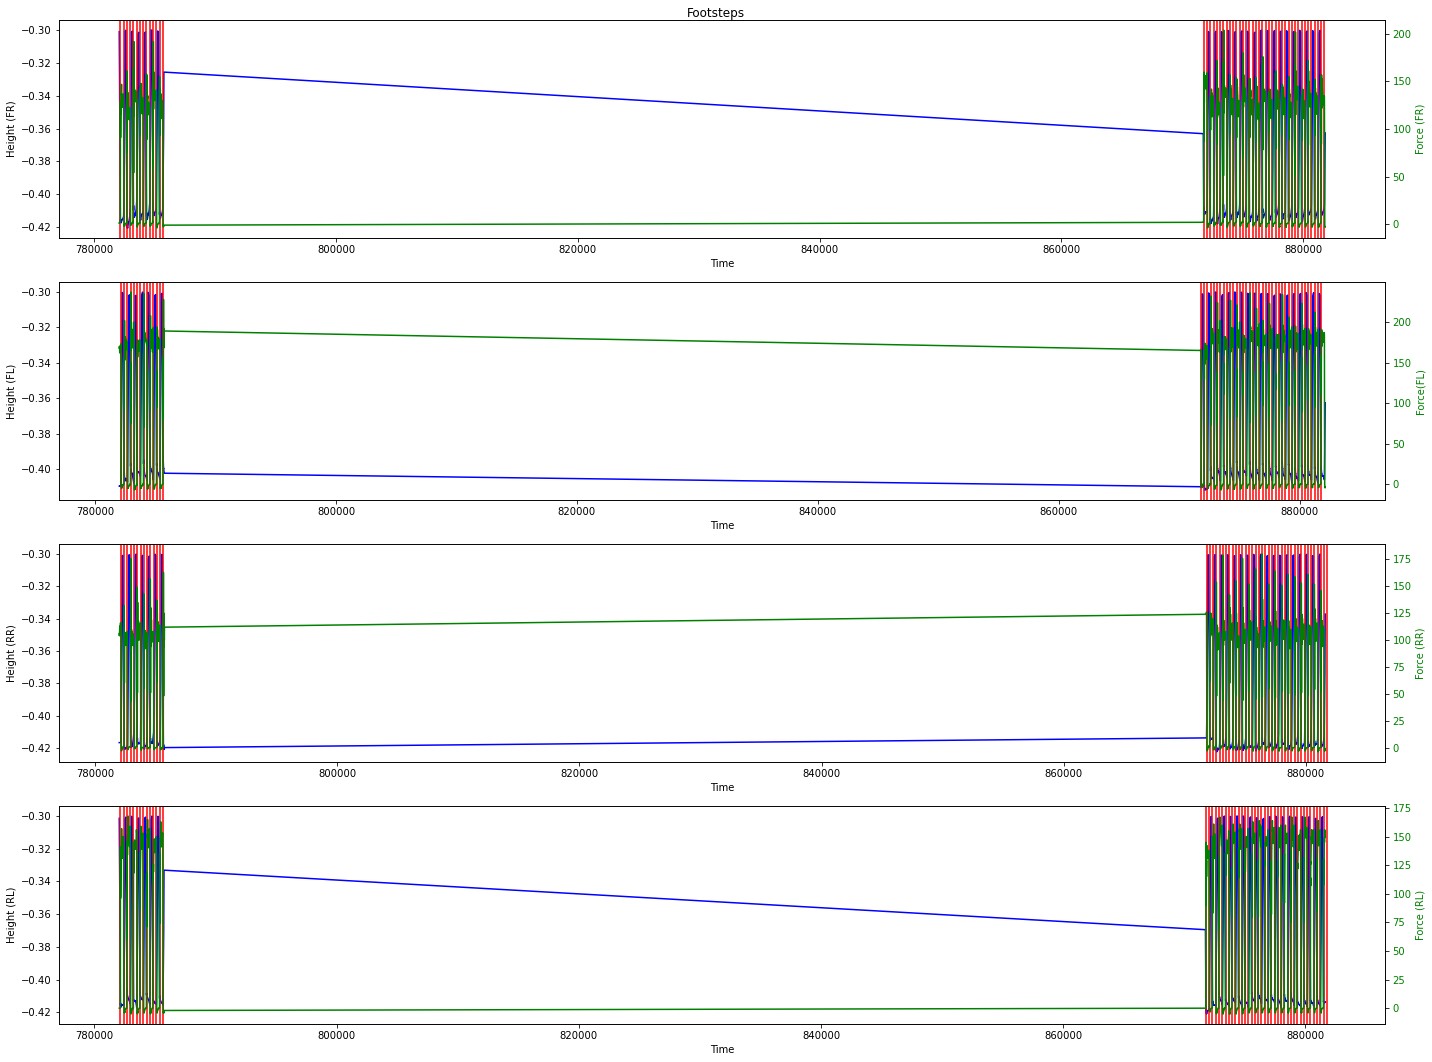

In [21]:
motion_06_side_right, footsteps_06_side_right = footstep_extraction_and_plotting(dataset=motion_06, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Side (left)

Foot swinging motions lenghts:  17382 17432 17392 17850
Min and max diff between front and rear feet 0.000504 0.26865 

Amount of footsteps found with height criteria:  8079 

Intersection with motion commands:  8079 

Intersection with no motion commands:  0 

Number of force footsteps:  598 

Number of height-force footsteps:  598 

Number of footsteps extracted with height-force due to motion:  598 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  598
Footsteps after non-maximum-suppression:  150


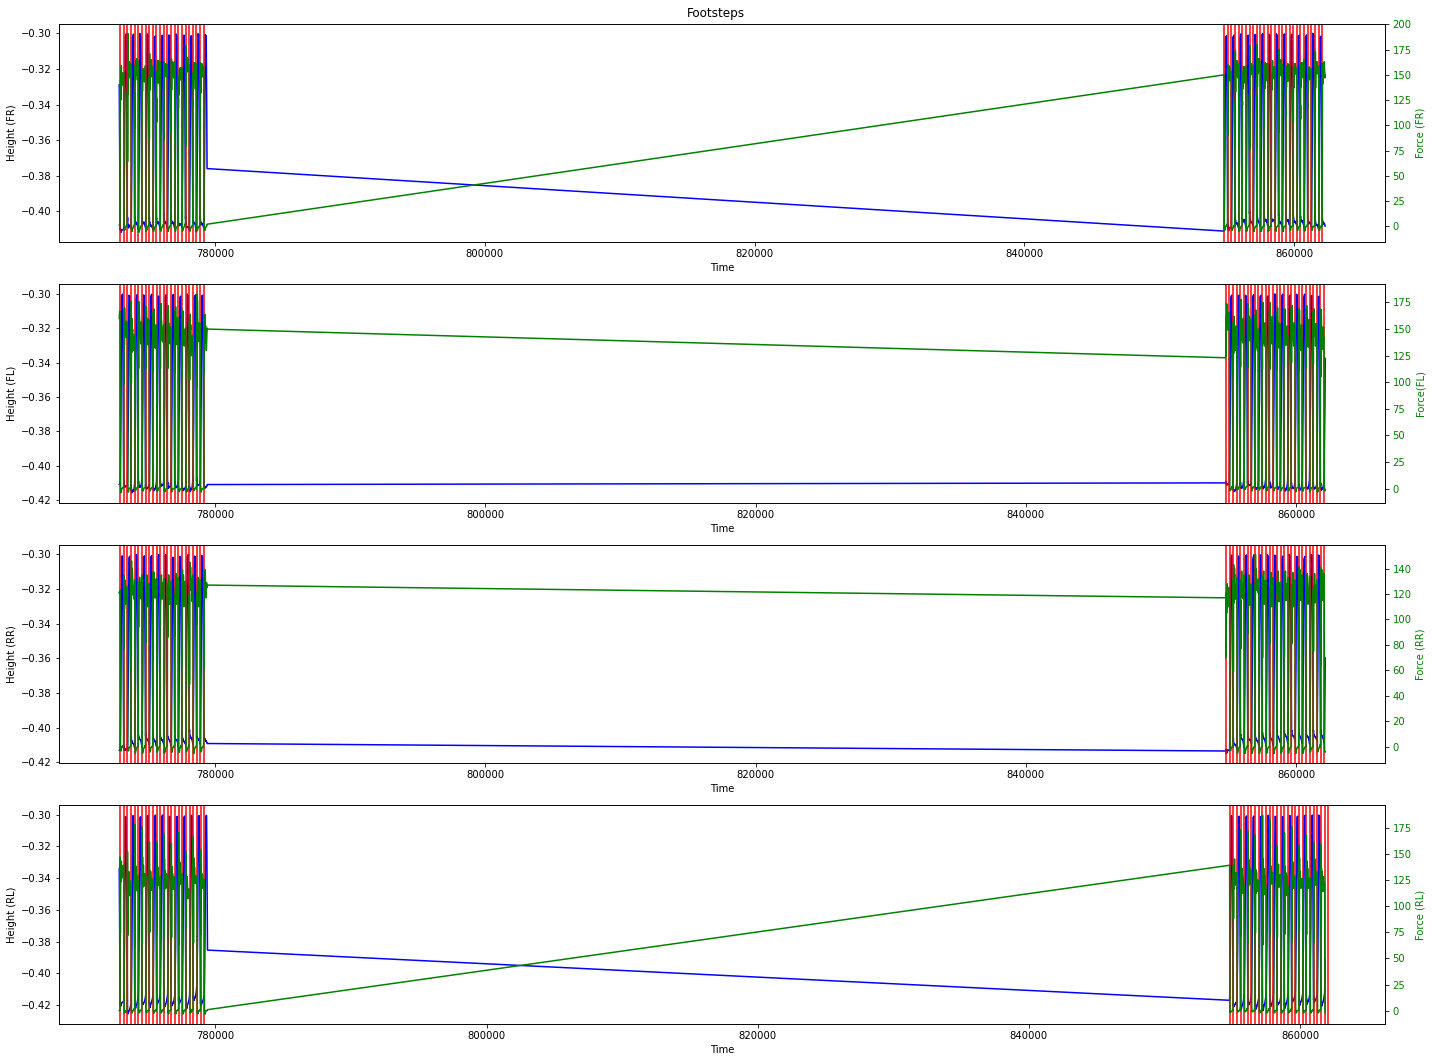

In [22]:
motion_06_side_left, footsteps_06_side_left = footstep_extraction_and_plotting(dataset=motion_06, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Rotation (clockwise)

Foot swinging motions lenghts:  6033 6354 6451 6021
Min and max diff between front and rear feet 0.000568 0.267812 

Amount of footsteps found with height criteria:  2971 

Intersection with motion commands:  2971 

Intersection with no motion commands:  0 

Number of force footsteps:  206 

Number of height-force footsteps:  206 

Number of footsteps extracted with height-force due to motion:  206 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  206
Footsteps after non-maximum-suppression:  53


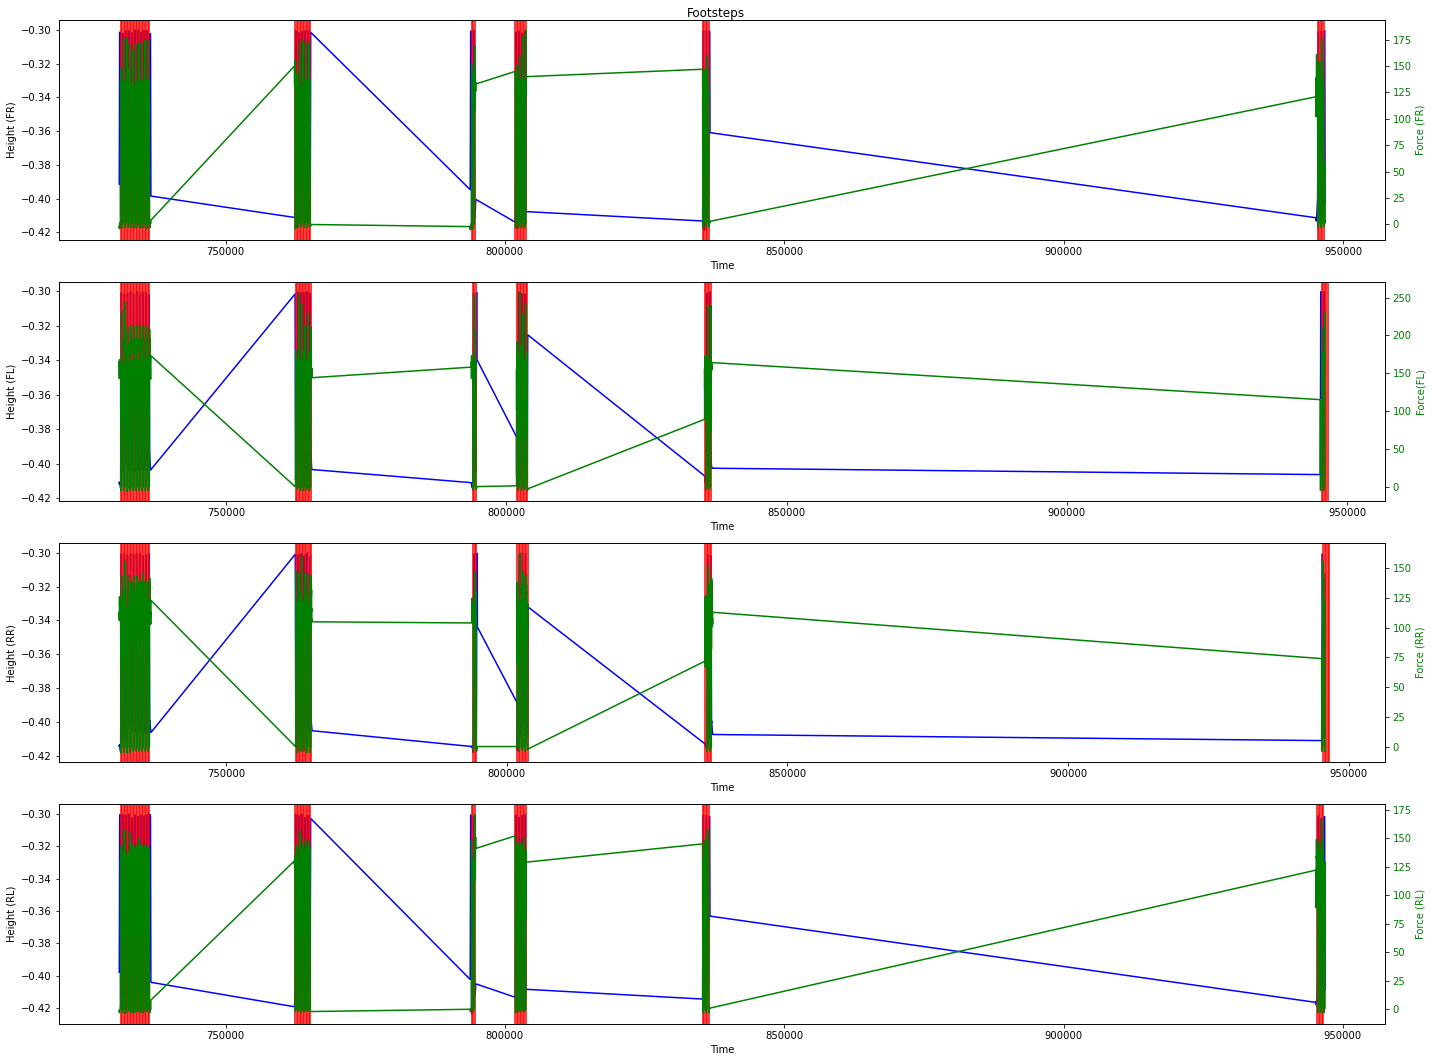

In [23]:
motion_06_clock, footsteps_06_clock = footstep_extraction_and_plotting(dataset=motion_06, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(0, 6000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  8867 8511 8533 9195
Min and max diff between front and rear feet 0.000697 0.272898 

Amount of footsteps found with height criteria:  4160 

Intersection with motion commands:  4160 

Intersection with no motion commands:  0 

Number of force footsteps:  289 

Number of height-force footsteps:  289 

Number of footsteps extracted with height-force due to motion:  289 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  289
Footsteps after non-maximum-suppression:  76


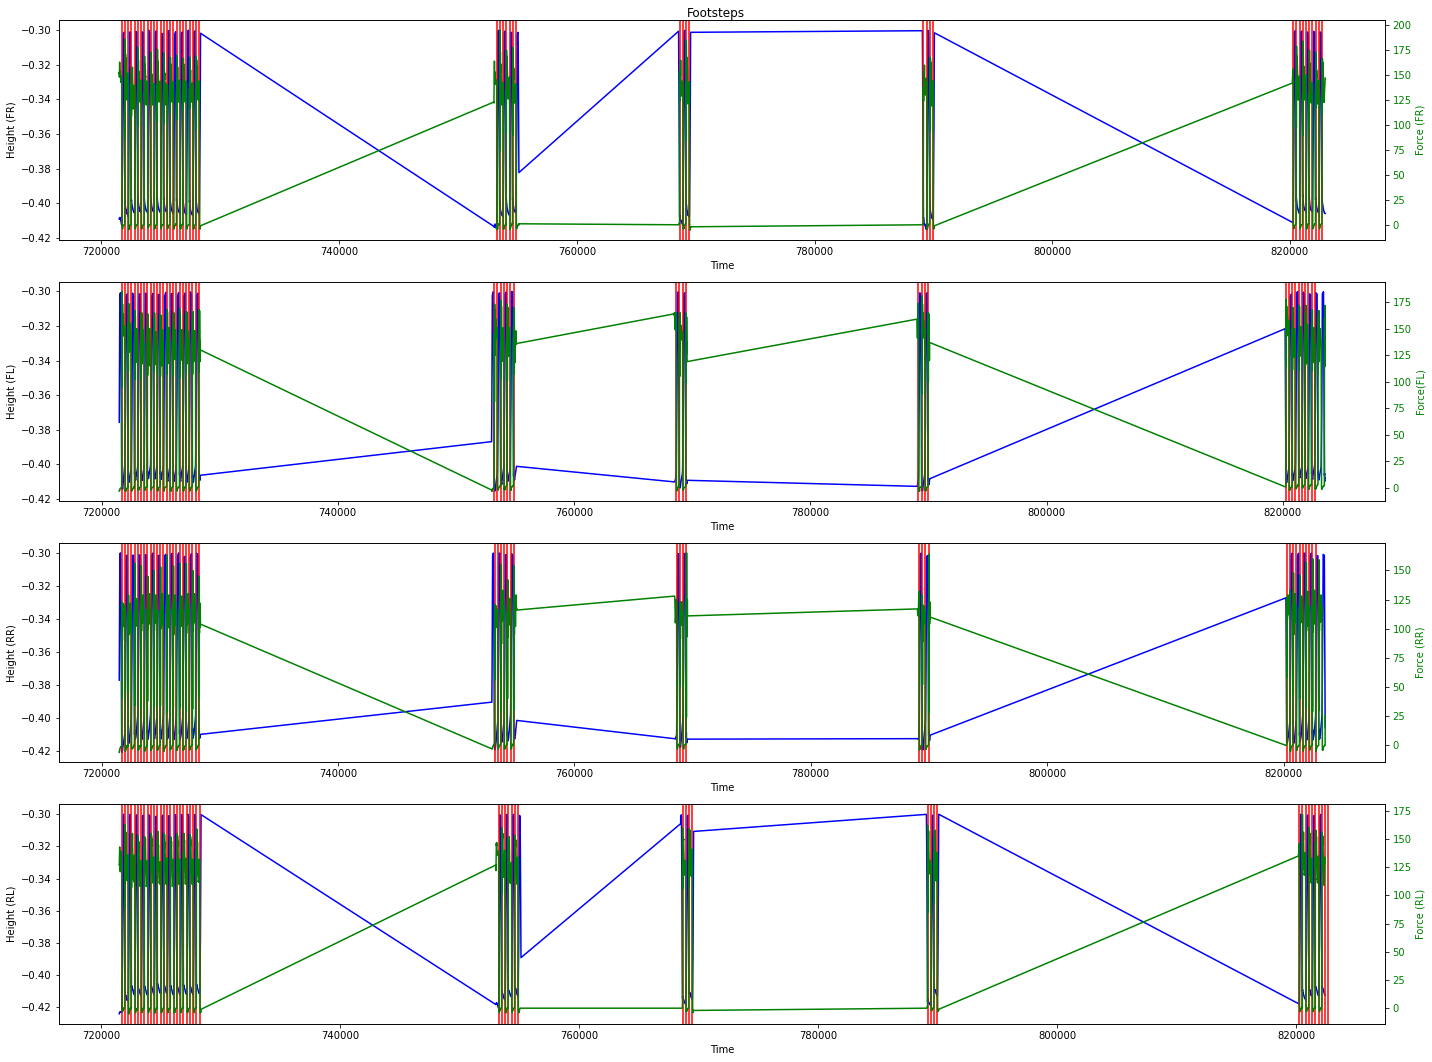

In [24]:
motion_06_count, footsteps_06_count = footstep_extraction_and_plotting(dataset=motion_06, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Step size

In [25]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                footstep_period.append(time_diff)
                step_size_fr.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fl.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_rr_numpy = np.array(step_size_rr)
    step_size_rl_numpy = np.array(step_size_rl)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_fl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [26]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_06_fwd, footsteps_06_fwd)

Avg. step size time:  264.32173913043476
Avg. step size for FR foot:  0.21978364181818186
Avg. step size for FL foot:  0.21978364181818186
Avg. step size for RR foot:  0.21978364181818186
Avg. step size for RL foot:  0.21978364181818186 

Std. dev. step size for FR foot:  0.043501438263569635
Std. dev. step size for FL foot:  0.043501438263569635
Std. dev. step size for RR foot:  0.043501438263569635
Std. dev. step size for RL foot:  0.043501438263569635 



In [27]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_06_fwd, footsteps_06_fwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  264.32173913043476
Avg. step size for FR foot:  0.023857395081967218
Avg. step size for FL foot:  0.023857395081967218
Avg. step size for RR foot:  0.023857395081967218
Avg. step size for RL foot:  0.023857395081967218 

Std. dev. step size for FR foot:  0.017324056039322383
Std. dev. step size for FL foot:  0.017324056039322383
Std. dev. step size for RR foot:  0.017324056039322383
Std. dev. step size for RL foot:  0.017324056039322383 



### Backward motion

In [28]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_06_bwd, footsteps_06_bwd)

Avg. step size time:  273.5176470588235
Avg. step size for FR foot:  0.09018855813953489
Avg. step size for FL foot:  0.09018855813953489
Avg. step size for RR foot:  0.09018855813953489
Avg. step size for RL foot:  0.09018855813953489 

Std. dev. step size for FR foot:  0.020432739903584886
Std. dev. step size for FL foot:  0.020432739903584886
Std. dev. step size for RR foot:  0.020432739903584886
Std. dev. step size for RL foot:  0.020432739903584886 



In [29]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_06_bwd, footsteps_06_bwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  273.5176470588235
Avg. step size for FR foot:  0.02556660975609756
Avg. step size for FL foot:  0.02556660975609756
Avg. step size for RR foot:  0.02556660975609756
Avg. step size for RL foot:  0.02556660975609756 

Std. dev. step size for FR foot:  0.011217632998614823
Std. dev. step size for FL foot:  0.011217632998614823
Std. dev. step size for RR foot:  0.011217632998614823
Std. dev. step size for RL foot:  0.011217632998614823 



### Side motion (right)

In [30]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_06_side_right, footsteps_06_side_right)

Avg. step size time:  269.77319587628864
Avg. step size for FR foot:  0.0032769259259259258
Avg. step size for FL foot:  0.0032769259259259258
Avg. step size for RR foot:  0.0032769259259259258
Avg. step size for RL foot:  0.0032769259259259258 

Std. dev. step size for FR foot:  0.0020802927309311278
Std. dev. step size for FL foot:  0.0020802927309311278
Std. dev. step size for RR foot:  0.0020802927309311278
Std. dev. step size for RL foot:  0.0020802927309311278 



In [31]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_06_side_right, footsteps_06_side_right, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.77319587628864
Avg. step size for FR foot:  0.0418079347826087
Avg. step size for FL foot:  0.0418079347826087
Avg. step size for RR foot:  0.0418079347826087
Avg. step size for RL foot:  0.0418079347826087 

Std. dev. step size for FR foot:  0.014777927639619621
Std. dev. step size for FL foot:  0.014777927639619621
Std. dev. step size for RR foot:  0.014777927639619621
Std. dev. step size for RL foot:  0.014777927639619621 



### Side motions (left)

In [32]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_06_side_left, footsteps_06_side_left)

Avg. step size time:  269.71232876712327
Avg. step size for FR foot:  0.01651612328767123
Avg. step size for FL foot:  0.01651612328767123
Avg. step size for RR foot:  0.01651612328767123
Avg. step size for RL foot:  0.01651612328767123 

Std. dev. step size for FR foot:  0.0031357620556623296
Std. dev. step size for FL foot:  0.0031357620556623296
Std. dev. step size for RR foot:  0.0031357620556623296
Std. dev. step size for RL foot:  0.0031357620556623296 



In [33]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_06_side_left, footsteps_06_side_left, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.71232876712327
Avg. step size for FR foot:  0.031796314666666665
Avg. step size for FL foot:  0.031796314666666665
Avg. step size for RR foot:  0.031796314666666665
Avg. step size for RL foot:  0.031796314666666665 

Std. dev. step size for FR foot:  0.011544047189054548
Std. dev. step size for FL foot:  0.011544047189054548
Std. dev. step size for RR foot:  0.011544047189054548
Std. dev. step size for RL foot:  0.011544047189054548 



### Rotation (clockwise)

In [34]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_06_clock, footsteps_06_clock)

Avg. step size time:  271.0425531914894
Avg. step size for FR foot:  0.04048966666666667
Avg. step size for FL foot:  0.04048966666666667
Avg. step size for RR foot:  0.04048966666666667
Avg. step size for RL foot:  0.04048966666666667 

Std. dev. step size for FR foot:  0.01492502270424478
Std. dev. step size for FL foot:  0.01492502270424478
Std. dev. step size for RR foot:  0.01492502270424478
Std. dev. step size for RL foot:  0.01492502270424478 



In [35]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_06_clock, footsteps_06_clock, idx_coord=[33, 36, 39, 42])

Avg. step size time:  271.0425531914894
Avg. step size for FR foot:  0.0592811304347826
Avg. step size for FL foot:  0.0592811304347826
Avg. step size for RR foot:  0.0592811304347826
Avg. step size for RL foot:  0.0592811304347826 

Std. dev. step size for FR foot:  0.020318659086414715
Std. dev. step size for FL foot:  0.020318659086414715
Std. dev. step size for RR foot:  0.020318659086414715
Std. dev. step size for RL foot:  0.020318659086414715 



### Rotation (counter clockwise)

In [36]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_06_count, footsteps_06_count)

Avg. step size time:  271.6865671641791
Avg. step size for FR foot:  0.02163284615384616
Avg. step size for FL foot:  0.02163284615384616
Avg. step size for RR foot:  0.02163284615384616
Avg. step size for RL foot:  0.02163284615384616 

Std. dev. step size for FR foot:  0.007135236713010326
Std. dev. step size for FL foot:  0.007135236713010326
Std. dev. step size for RR foot:  0.007135236713010326
Std. dev. step size for RL foot:  0.007135236713010326 



In [37]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_06_count, footsteps_06_count, idx_coord=[33, 36, 39, 42])

Avg. step size time:  271.6865671641791
Avg. step size for FR foot:  0.05987280277777778
Avg. step size for FL foot:  0.05987280277777778
Avg. step size for RR foot:  0.05987280277777778
Avg. step size for RL foot:  0.05987280277777778 

Std. dev. step size for FR foot:  0.010664397972941091
Std. dev. step size for FL foot:  0.010664397972941091
Std. dev. step size for RR foot:  0.010664397972941091
Std. dev. step size for RL foot:  0.010664397972941091 



### Footstep visualization

In [38]:
def visualize_static_foosteps(dataset, footsteps):
    # Visualize footsteps
    for footstep in footsteps:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

        print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

In [39]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [40]:
def update_prediction_points(dataset, num, x, y, z, points, ax):
    ax.set_title('Frame ' + num)
    print(num)
    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')
    
    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points, ax))
    
    return anim   

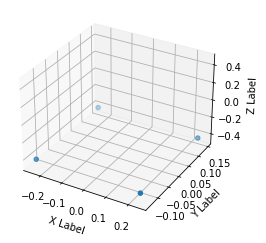

Time diff:  275.0
Footstep timestamp:  741865.0
Height check index:  49
Height check timestamp:  741964.0

FL moving: 0.000140000000000029. FR moving: 0.07572899999999999
RL moving: 0.07526299999999997. RR moving: 0.000144000000000033

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412053. FR later: -0.336324
RR moving: -0.410056. RL moving: -0.410196

Coord FR: [0.232, -0.135, -0.412]. Coord FL: [0.24, 0.135, -0.41]. Coord RR: [-0.243, -0.133, -0.412]. Coord RL: [-0.244, 0.144, -0.417]

FR step_size: 0.065558. FL step_size: 0. RR step size: 0. RL step_size: 0.06946800000000003.


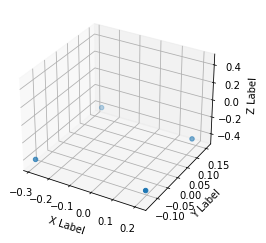

Time diff:  256.0
Footstep timestamp:  742140.0
Height check index:  186
Height check timestamp:  742239.0

FL moving: 0.09168500000000002. FR moving: 0.0012280000000000069
RL moving: 0.0007900000000000129. RR moving: 0.09068100000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.415304. FR later: -0.414076
RR moving: -0.406681. RL moving: -0.314996

Coord FR: [0.212, -0.118, -0.415]. Coord FL: [0.195, 0.133, -0.407]. Coord RR: [-0.287, -0.134, -0.41]. Coord RL: [-0.269, 0.154, -0.405]

FR step_size: 0.19347540000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.21524399999999996.


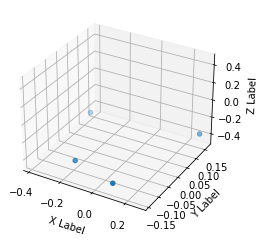

Time diff:  283.0
Footstep timestamp:  742396.0
Height check index:  314
Height check timestamp:  742496.0

FL moving: 0.0025590000000000335. FR moving: 0.07441999999999999
RL moving: 0.06999499999999997. RR moving: 0.0063610000000000055

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399786. FR later: -0.325366
RR moving: -0.381592. RL moving: -0.384151

Coord FR: [0.098, -0.142, -0.4]. Coord FL: [0.274, 0.161, -0.382]. Coord RR: [-0.189, -0.101, -0.399]. Coord RL: [-0.386, 0.121, -0.398]

FR step_size: 0.4522513. FL step_size: 0. RR step size: 0. RL step_size: 0.46933.


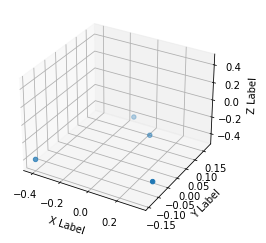

Time diff:  267.0
Footstep timestamp:  742679.0
Height check index:  455
Height check timestamp:  742779.0

FL moving: 0.08757299999999996. FR moving: 0.010222000000000009
RL moving: 0.010418999999999956. RR moving: 0.08831699999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.391783. FR later: -0.402005
RR moving: -0.398842. RL moving: -0.311269

Coord FR: [0.342, -0.089, -0.392]. Coord FL: [0.066, 0.105, -0.399]. Coord RR: [-0.412, -0.142, -0.41]. Coord RL: [-0.139, 0.17, -0.406]

FR step_size: 0.500229. FL step_size: 0. RR step size: 0. RL step_size: 0.465674.


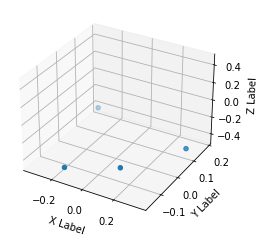

Time diff:  259.0
Footstep timestamp:  742946.0
Height check index:  588
Height check timestamp:  743046.0

FL moving: 0.005302000000000029. FR moving: 0.08919600000000005
RL moving: 0.089003. RR moving: 0.010531999999999986

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395508. FR later: -0.306312
RR moving: -0.39592. RL moving: -0.401222

Coord FR: [0.125, -0.085, -0.396]. Coord FL: [0.349, 0.098, -0.396]. Coord RR: [-0.146, -0.162, -0.395]. Coord RL: [-0.339, 0.185, -0.419]

FR step_size: 0.427492. FL step_size: 0. RR step size: 0. RL step_size: 0.424534.


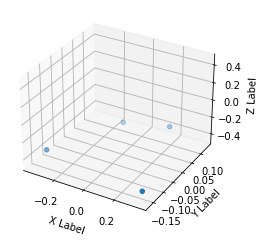

Time diff:  271.0
Footstep timestamp:  743205.0
Height check index:  717
Height check timestamp:  743305.0

FL moving: 0.08174099999999995. FR moving: 0.011689000000000005
RL moving: 0.007860000000000034. RR moving: 0.08000000000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.383866. FR later: -0.395555
RR moving: -0.398956. RL moving: -0.317215

Coord FR: [0.351, -0.165, -0.384]. Coord FL: [0.148, 0.134, -0.399]. Coord RR: [-0.359, -0.115, -0.407]. Coord RL: [-0.127, 0.097, -0.408]

FR step_size: 0.43516199999999994. FL step_size: 0. RR step size: 0. RL step_size: 0.456422.


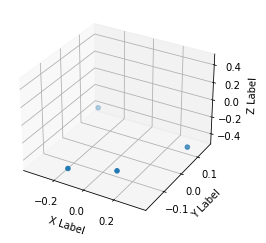

Time diff:  13562.0


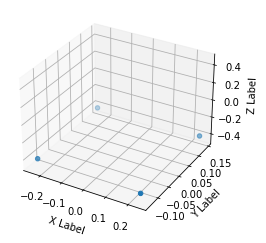

Time diff:  269.0
Footstep timestamp:  757038.0
Height check index:  938
Height check timestamp:  757138.0

FL moving: 0.0025379999999999847. FR moving: 0.09375099999999997
RL moving: 0.09282000000000001. RR moving: 0.0022649999999999615

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.413898. FR later: -0.320147
RR moving: -0.406026. RL moving: -0.408564

Coord FR: [0.234, -0.135, -0.414]. Coord FL: [0.241, 0.142, -0.406]. Coord RR: [-0.24, -0.129, -0.414]. Coord RL: [-0.243, 0.139, -0.414]

FR step_size: 0.073735. FL step_size: 0. RR step size: 0. RL step_size: 0.07736599999999999.


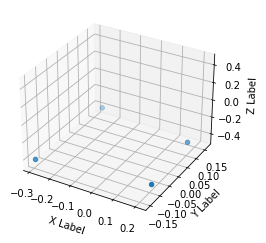

Time diff:  255.0
Footstep timestamp:  757307.0
Height check index:  1071
Height check timestamp:  757406.0

FL moving: 0.093032. FR moving: 0.0020020000000000038
RL moving: 0.002008999999999983. RR moving: 0.09165899999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.4145. FR later: -0.412498
RR moving: -0.407684. RL moving: -0.314652

Coord FR: [0.211, -0.102, -0.414]. Coord FL: [0.19, 0.119, -0.408]. Coord RR: [-0.291, -0.15, -0.41]. Coord RL: [-0.27, 0.163, -0.406]

FR step_size: 0.19576219999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.21947399999999997.


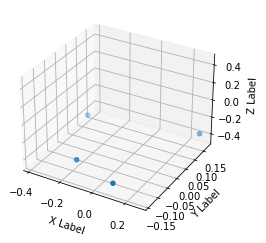

Time diff:  18.0
Footstep timestamp:  757562.0
Height check index:  1198
Height check timestamp:  757661.0

FL moving: 0.00270999999999999. FR moving: 0.07259199999999999
RL moving: 0.06926199999999999. RR moving: 0.006149999999999989

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.398584. FR later: -0.325992
RR moving: -0.378956. RL moving: -0.381666

Coord FR: [0.1, -0.139, -0.399]. Coord FL: [0.275, 0.17, -0.379]. Coord RR: [-0.185, -0.092, -0.399]. Coord RL: [-0.384, 0.115, -0.401]

FR step_size: 0.03667320000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.03495100000000001.


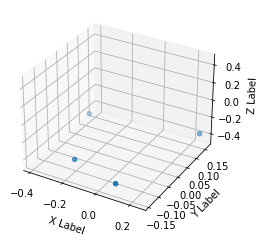

Time diff:  265.0
Footstep timestamp:  757580.0
Height check index:  1207
Height check timestamp:  757679.0

FL moving: 0.004379999999999995. FR moving: 0.094474
RL moving: 0.094663. RR moving: 0.008944000000000007

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394551. FR later: -0.300077
RR moving: -0.378282. RL moving: -0.382662

Coord FR: [0.092, -0.142, -0.395]. Coord FL: [0.246, 0.16, -0.378]. Coord RR: [-0.21, -0.098, -0.396]. Coord RL: [-0.394, 0.114, -0.399]

FR step_size: 0.4302808. FL step_size: 0. RR step size: 0. RL step_size: 0.458638.


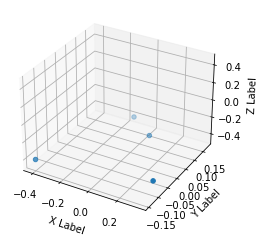

Time diff:  265.0
Footstep timestamp:  757845.0
Height check index:  1339
Height check timestamp:  757944.0

FL moving: 0.08571099999999998. FR moving: 0.011716000000000004
RL moving: 0.010014000000000023. RR moving: 0.086476

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388942. FR later: -0.400658
RR moving: -0.398128. RL moving: -0.312417

Coord FR: [0.341, -0.086, -0.389]. Coord FL: [0.065, 0.105, -0.398]. Coord RR: [-0.413, -0.142, -0.411]. Coord RL: [-0.139, 0.173, -0.405]

FR step_size: 0.504456. FL step_size: 0. RR step size: 0. RL step_size: 0.473055.


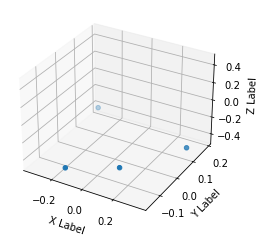

Time diff:  261.0
Footstep timestamp:  758110.0
Height check index:  1471
Height check timestamp:  758209.0

FL moving: 0.006949999999999956. FR moving: 0.086341
RL moving: 0.08548299999999998. RR moving: 0.009091000000000016

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394424. FR later: -0.308083
RR moving: -0.391948. RL moving: -0.398898

Coord FR: [0.124, -0.081, -0.394]. Coord FL: [0.353, 0.105, -0.392]. Coord RR: [-0.14, -0.156, -0.397]. Coord RL: [-0.34, 0.188, -0.418]

FR step_size: 0.43427799999999994. FL step_size: 0. RR step size: 0. RL step_size: 0.433647.


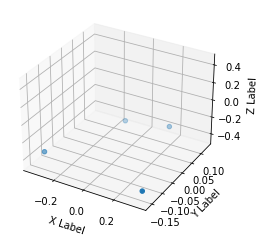

Time diff:  271.0
Footstep timestamp:  758371.0
Height check index:  1601
Height check timestamp:  758470.0

FL moving: 0.08043699999999998. FR moving: 0.011519000000000001
RL moving: 0.006861000000000006. RR moving: 0.08108500000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.382407. FR later: -0.393926
RR moving: -0.398171. RL moving: -0.317734

Coord FR: [0.354, -0.158, -0.382]. Coord FL: [0.148, 0.132, -0.398]. Coord RR: [-0.359, -0.119, -0.408]. Coord RL: [-0.125, 0.106, -0.409]

FR step_size: 0.435798. FL step_size: 0. RR step size: 0. RL step_size: 0.455338.


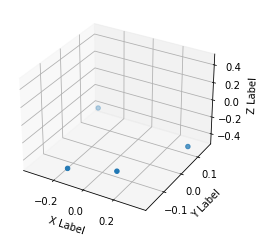

Time diff:  262.0
Footstep timestamp:  758642.0
Height check index:  1736
Height check timestamp:  758741.0

FL moving: 0.0069270000000000165. FR moving: 0.08437999999999996
RL moving: 0.08658300000000002. RR moving: 0.011178999999999994

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392437. FR later: -0.308057
RR moving: -0.392597. RL moving: -0.399524

Coord FR: [0.126, -0.122, -0.392]. Coord FL: [0.355, 0.085, -0.393]. Coord RR: [-0.136, -0.175, -0.395]. Coord RL: [-0.357, 0.157, -0.422]

FR step_size: 0.453445. FL step_size: 0. RR step size: 0. RL step_size: 0.46497999999999995.


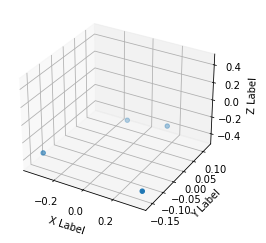

Time diff:  39447.0


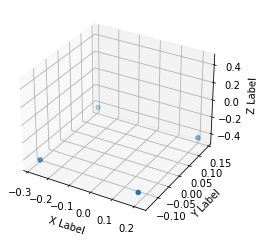

Time diff:  255.0
Footstep timestamp:  798351.0
Height check index:  1973
Height check timestamp:  798450.0

FL moving: 0.09446499999999997. FR moving: 0.0005400000000000404
RL moving: 0.0008009999999999962. RR moving: 0.09328999999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.411905. FR later: -0.411365
RR moving: -0.410151. RL moving: -0.315686

Coord FR: [0.197, -0.136, -0.412]. Coord FL: [0.215, 0.133, -0.41]. Coord RR: [-0.266, -0.132, -0.412]. Coord RL: [-0.284, 0.141, -0.415]

FR step_size: 0.15775560000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.16897700000000002.


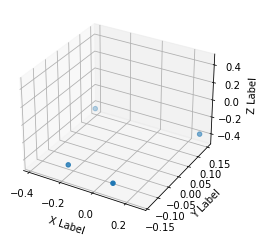

Time diff:  277.0
Footstep timestamp:  798606.0
Height check index:  2100
Height check timestamp:  798705.0

FL moving: 0.0013150000000000106. FR moving: 0.07268400000000003
RL moving: 0.06794699999999998. RR moving: 0.00477099999999997

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399152. FR later: -0.326468
RR moving: -0.383739. RL moving: -0.385054

Coord FR: [0.097, -0.136, -0.399]. Coord FL: [0.272, 0.147, -0.384]. Coord RR: [-0.201, -0.121, -0.4]. Coord RL: [-0.388, 0.133, -0.4]

FR step_size: 0.43681570000000003. FL step_size: 0. RR step size: 0. RL step_size: 0.44362599999999996.


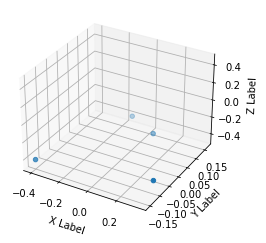

Time diff:  269.0
Footstep timestamp:  798883.0
Height check index:  2238
Height check timestamp:  798982.0

FL moving: 0.08266800000000002. FR moving: 0.01067199999999996
RL moving: 0.01149. RR moving: 0.08464900000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389008. FR later: -0.39968
RR moving: -0.396594. RL moving: -0.313926

Coord FR: [0.342, -0.092, -0.389]. Coord FL: [0.08, 0.109, -0.397]. Coord RR: [-0.401, -0.149, -0.412]. Coord RL: [-0.144, 0.163, -0.402]

FR step_size: 0.480074. FL step_size: 0. RR step size: 0. RL step_size: 0.456233.


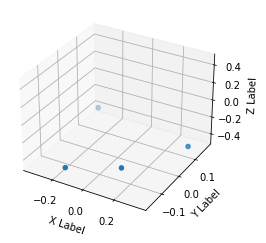

Time diff:  259.0
Footstep timestamp:  799152.0
Height check index:  2372
Height check timestamp:  799251.0

FL moving: 0.005087999999999981. FR moving: 0.089339
RL moving: 0.08759100000000003. RR moving: 0.010001000000000038

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394244. FR later: -0.304905
RR moving: -0.39411. RL moving: -0.399198

Coord FR: [0.129, -0.089, -0.394]. Coord FL: [0.347, 0.101, -0.394]. Coord RR: [-0.145, -0.164, -0.395]. Coord RL: [-0.344, 0.173, -0.418]

FR step_size: 0.426211. FL step_size: 0. RR step size: 0. RL step_size: 0.431581.


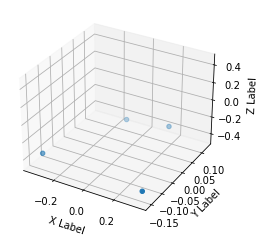

Time diff:  272.0
Footstep timestamp:  799411.0
Height check index:  2501
Height check timestamp:  799510.0

FL moving: 0.080677. FR moving: 0.01097999999999999
RL moving: 0.008382. RR moving: 0.08042100000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.383601. FR later: -0.394581
RR moving: -0.398432. RL moving: -0.317755

Coord FR: [0.353, -0.155, -0.384]. Coord FL: [0.145, 0.127, -0.398]. Coord RR: [-0.358, -0.125, -0.408]. Coord RL: [-0.125, 0.108, -0.408]

FR step_size: 0.436249. FL step_size: 0. RR step size: 0. RL step_size: 0.44765499999999997.


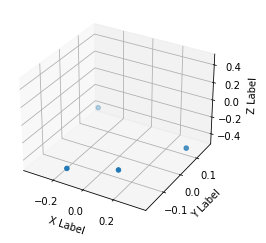

Time diff:  5415.0


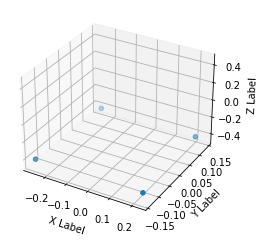

Time diff:  263.0
Footstep timestamp:  805098.0
Height check index:  2720
Height check timestamp:  805197.0

FL moving: 0.00022400000000000198. FR moving: 0.09499600000000002
RL moving: 0.09476699999999999. RR moving: 0.0016049999999999676

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.408824. FR later: -0.313828
RR moving: -0.410048. RL moving: -0.410272

Coord FR: [0.225, -0.136, -0.409]. Coord FL: [0.212, 0.132, -0.41]. Coord RR: [-0.267, -0.139, -0.407]. Coord RL: [-0.251, 0.139, -0.415]

FR step_size: 0.08765399999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.09285699999999997.


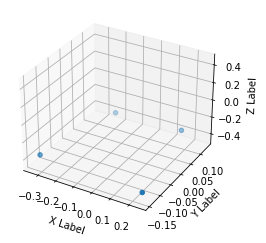

Time diff:  259.0
Footstep timestamp:  805361.0
Height check index:  2851
Height check timestamp:  805460.0

FL moving: 0.08731499999999998. FR moving: 0.0018439999999999568
RL moving: 0.0015339999999999798. RR moving: 0.08559800000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.398296. FR later: -0.396452
RR moving: -0.401424. RL moving: -0.314109

Coord FR: [0.245, -0.146, -0.398]. Coord FL: [0.144, 0.134, -0.401]. Coord RR: [-0.34, -0.127, -0.401]. Coord RL: [-0.231, 0.13, -0.407]

FR step_size: 0.3391478. FL step_size: 0. RR step size: 0. RL step_size: 0.332758.


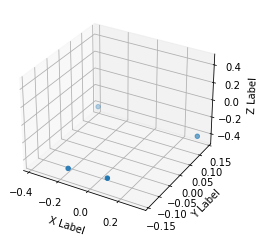

Time diff:  277.0
Footstep timestamp:  805620.0
Height check index:  2980
Height check timestamp:  805719.0

FL moving: 0.007764999999999966. FR moving: 0.07401000000000002
RL moving: 0.07288099999999997. RR moving: 0.009933999999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.390676. FR later: -0.316666
RR moving: -0.381539. RL moving: -0.389304

Coord FR: [0.086, -0.132, -0.391]. Coord FL: [0.324, 0.126, -0.382]. Coord RR: [-0.161, -0.141, -0.393]. Coord RL: [-0.385, 0.138, -0.406]

FR step_size: 0.478954. FL step_size: 0. RR step size: 0. RL step_size: 0.46727699999999994.


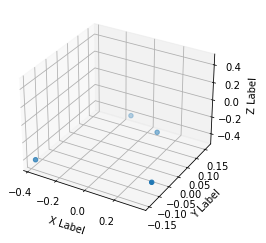

Time diff:  263.0
Footstep timestamp:  805897.0
Height check index:  3118
Height check timestamp:  805996.0

FL moving: 0.08773999999999998. FR moving: 0.00934299999999999
RL moving: 0.012726000000000015. RR moving: 0.089312

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389284. FR later: -0.398627
RR moving: -0.391467. RL moving: -0.303727

Coord FR: [0.354, -0.098, -0.389]. Coord FL: [0.113, 0.116, -0.391]. Coord RR: [-0.376, -0.145, -0.414]. Coord RL: [-0.133, 0.16, -0.4]

FR step_size: 0.463091. FL step_size: 0. RR step size: 0. RL step_size: 0.465541.


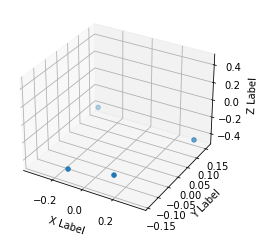

Time diff:  270.0
Footstep timestamp:  806160.0
Height check index:  3249
Height check timestamp:  806259.0

FL moving: 0.007571999999999968. FR moving: 0.08464900000000003
RL moving: 0.083071. RR moving: 0.007769999999999999

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394907. FR later: -0.310258
RR moving: -0.385861. RL moving: -0.393433

Coord FR: [0.136, -0.109, -0.395]. Coord FL: [0.358, 0.125, -0.386]. Coord RR: [-0.125, -0.139, -0.401]. Coord RL: [-0.347, 0.156, -0.414]

FR step_size: 0.446399. FL step_size: 0. RR step size: 0. RL step_size: 0.45181799999999994.


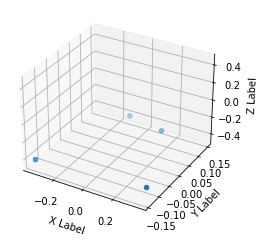

Time diff:  263.0
Footstep timestamp:  806430.0
Height check index:  3384
Height check timestamp:  806530.0

FL moving: 0.089084. FR moving: 0.008968000000000032
RL moving: 0.009056999999999982. RR moving: 0.09170799999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389982. FR later: -0.39895
RR moving: -0.396527. RL moving: -0.307443

Coord FR: [0.36, -0.121, -0.39]. Coord FL: [0.136, 0.118, -0.397]. Coord RR: [-0.356, -0.141, -0.412]. Coord RL: [-0.126, 0.146, -0.408]

FR step_size: 0.442588. FL step_size: 0. RR step size: 0. RL step_size: 0.44981499999999996.


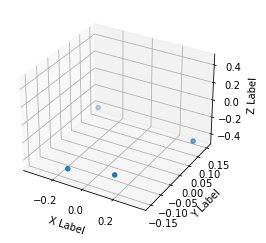

Time diff:  269.0
Footstep timestamp:  806693.0
Height check index:  3515
Height check timestamp:  806793.0

FL moving: 0.007089999999999985. FR moving: 0.08566799999999997
RL moving: 0.08569900000000003. RR moving: 0.007537999999999989

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394429. FR later: -0.308761
RR moving: -0.390423. RL moving: -0.397513

Coord FR: [0.138, -0.121, -0.394]. Coord FL: [0.357, 0.114, -0.39]. Coord RR: [-0.128, -0.153, -0.399]. Coord RL: [-0.348, 0.151, -0.418]

FR step_size: 0.44841600000000004. FL step_size: 0. RR step size: 0. RL step_size: 0.45537099999999997.


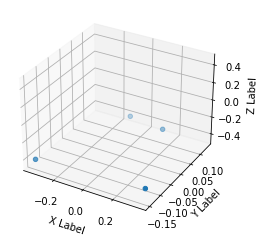

Time diff:  267.0
Footstep timestamp:  806962.0
Height check index:  3649
Height check timestamp:  807062.0

FL moving: 0.08800999999999998. FR moving: 0.010718000000000005
RL moving: 0.007172999999999985. RR moving: 0.08853100000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388225. FR later: -0.398943
RR moving: -0.399229. RL moving: -0.311219

Coord FR: [0.361, -0.133, -0.388]. Coord FL: [0.132, 0.116, -0.399]. Coord RR: [-0.359, -0.147, -0.409]. Coord RL: [-0.124, 0.135, -0.41]

FR step_size: 0.45160599999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.455777.


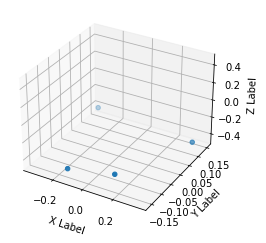

Time diff:  267.0
Footstep timestamp:  807229.0
Height check index:  3782
Height check timestamp:  807329.0

FL moving: 0.005433999999999994. FR moving: 0.08862499999999995
RL moving: 0.08849200000000002. RR moving: 0.009354000000000029

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394489. FR later: -0.305864
RR moving: -0.392966. RL moving: -0.3984

Coord FR: [0.135, -0.122, -0.394]. Coord FL: [0.358, 0.108, -0.393]. Coord RR: [-0.13, -0.157, -0.398]. Coord RL: [-0.35, 0.15, -0.418]

FR step_size: 0.44636. FL step_size: 0. RR step size: 0. RL step_size: 0.4512999999999999.


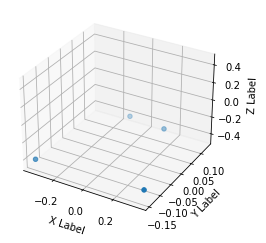

Time diff:  265.0
Footstep timestamp:  807496.0
Height check index:  3915
Height check timestamp:  807596.0

FL moving: 0.08975300000000003. FR moving: 0.009651999999999994
RL moving: 0.006371999999999989. RR moving: 0.08865199999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388966. FR later: -0.398618
RR moving: -0.39983. RL moving: -0.310077

Coord FR: [0.359, -0.137, -0.389]. Coord FL: [0.136, 0.115, -0.4]. Coord RR: [-0.356, -0.145, -0.408]. Coord RL: [-0.125, 0.13, -0.411]

FR step_size: 0.44462799999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.44916199999999995.


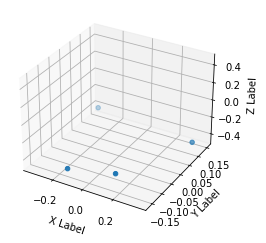

Time diff:  267.0
Footstep timestamp:  807761.0
Height check index:  4047
Height check timestamp:  807861.0

FL moving: 0.006085000000000007. FR moving: 0.086899
RL moving: 0.08757999999999999. RR moving: 0.009118999999999988

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394564. FR later: -0.307665
RR moving: -0.392899. RL moving: -0.398984

Coord FR: [0.135, -0.121, -0.395]. Coord FL: [0.357, 0.107, -0.393]. Coord RR: [-0.13, -0.16, -0.398]. Coord RL: [-0.349, 0.15, -0.419]

FR step_size: 0.447609. FL step_size: 0. RR step size: 0. RL step_size: 0.45278199999999996.


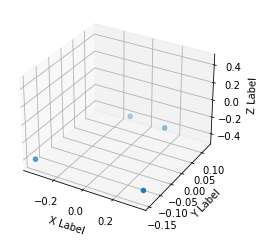

Time diff:  269.0
Footstep timestamp:  808028.0
Height check index:  4180
Height check timestamp:  808128.0

FL moving: 0.088702. FR moving: 0.01075799999999999
RL moving: 0.0061169999999999836. RR moving: 0.08826600000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388236. FR later: -0.398994
RR moving: -0.400497. RL moving: -0.311795

Coord FR: [0.361, -0.14, -0.388]. Coord FL: [0.135, 0.115, -0.4]. Coord RR: [-0.358, -0.145, -0.407]. Coord RL: [-0.124, 0.125, -0.411]

FR step_size: 0.448368. FL step_size: 0. RR step size: 0. RL step_size: 0.44945100000000004.


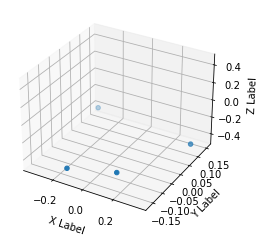

Time diff:  21458.0


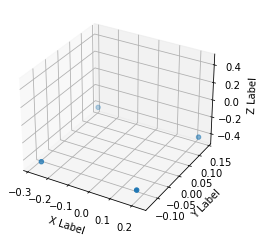

Time diff:  257.0
Footstep timestamp:  829755.0
Height check index:  4399
Height check timestamp:  829855.0

FL moving: 0.09710000000000002. FR moving: 0.0002869999999999817
RL moving: 0.0003630000000000022. RR moving: 0.09920000000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.414683. FR later: -0.41497
RR moving: -0.40847. RL moving: -0.31137

Coord FR: [0.194, -0.126, -0.415]. Coord FL: [0.227, 0.134, -0.408]. Coord RR: [-0.255, -0.133, -0.415]. Coord RL: [-0.284, 0.139, -0.414]

FR step_size: 0.10766300000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.12006900000000001.


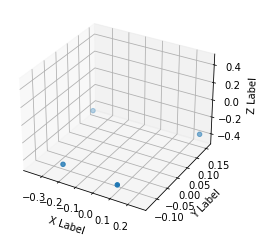

Time diff:  273.0
Footstep timestamp:  830012.0
Height check index:  4527
Height check timestamp:  830112.0

FL moving: 0.0009460000000000024. FR moving: 0.079374
RL moving: 0.073206. RR moving: 0.0015370000000000106

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.40243. FR later: -0.323056
RR moving: -0.386288. RL moving: -0.387234

Coord FR: [0.115, -0.131, -0.402]. Coord FL: [0.255, 0.154, -0.386]. Coord RR: [-0.217, -0.119, -0.403]. Coord RL: [-0.366, 0.129, -0.402]

FR step_size: 0.39810880000000004. FL step_size: 0. RR step size: 0. RL step_size: 0.403617.


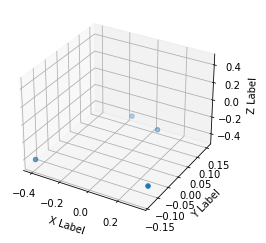

Time diff:  267.0
Footstep timestamp:  830285.0
Height check index:  4663
Height check timestamp:  830385.0

FL moving: 0.08312199999999997. FR moving: 0.008528000000000036
RL moving: 0.012544. RR moving: 0.08454999999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389729. FR later: -0.398257
RR moving: -0.395302. RL moving: -0.31218

Coord FR: [0.334, -0.109, -0.39]. Coord FL: [0.076, 0.122, -0.395]. Coord RR: [-0.404, -0.136, -0.411]. Coord RL: [-0.15, 0.151, -0.402]

FR step_size: 0.485068. FL step_size: 0. RR step size: 0. RL step_size: 0.46054800000000007.


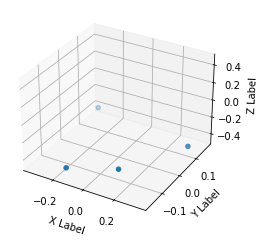

Time diff:  265.0
Footstep timestamp:  830552.0
Height check index:  4796
Height check timestamp:  830652.0

FL moving: 0.008228000000000013. FR moving: 0.08741500000000002
RL moving: 0.087256. RR moving: 0.00966499999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.391836. FR later: -0.304421
RR moving: -0.390969. RL moving: -0.399197

Coord FR: [0.122, -0.102, -0.392]. Coord FL: [0.349, 0.095, -0.391]. Coord RR: [-0.142, -0.166, -0.394]. Coord RL: [-0.349, 0.167, -0.419]

FR step_size: 0.442917. FL step_size: 0. RR step size: 0. RL step_size: 0.445808.


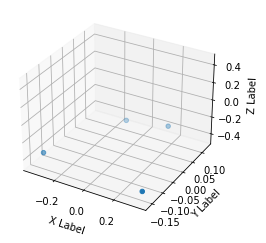

Time diff:  269.0
Footstep timestamp:  830817.0
Height check index:  4928
Height check timestamp:  830917.0

FL moving: 0.08582900000000004. FR moving: 0.010124000000000022
RL moving: 0.00837300000000002. RR moving: 0.085619

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385808. FR later: -0.395932
RR moving: -0.39733. RL moving: -0.311501

Coord FR: [0.355, -0.159, -0.386]. Coord FL: [0.139, 0.126, -0.397]. Coord RR: [-0.364, -0.125, -0.409]. Coord RL: [-0.125, 0.103, -0.408]

FR step_size: 0.448109. FL step_size: 0. RR step size: 0. RL step_size: 0.464474.


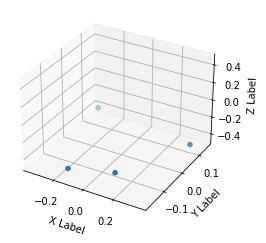

Time diff:  265.0
Footstep timestamp:  831086.0
Height check index:  5062
Height check timestamp:  831186.0

FL moving: 0.0061410000000000076. FR moving: 0.08746900000000002
RL moving: 0.08914699999999998. RR moving: 0.009587999999999985

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394056. FR later: -0.306587
RR moving: -0.393734. RL moving: -0.399875

Coord FR: [0.126, -0.13, -0.394]. Coord FL: [0.358, 0.089, -0.394]. Coord RR: [-0.133, -0.173, -0.395]. Coord RL: [-0.358, 0.146, -0.419]

FR step_size: 0.459296. FL step_size: 0. RR step size: 0. RL step_size: 0.464252.


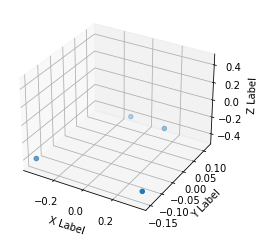

Time diff:  267.0
Footstep timestamp:  831351.0
Height check index:  5193
Height check timestamp:  831450.0

FL moving: 0.08547099999999996. FR moving: 0.011882999999999977
RL moving: 0.0068010000000000015. RR moving: 0.08487800000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.384879. FR later: -0.396762
RR moving: -0.40107. RL moving: -0.315599

Coord FR: [0.363, -0.151, -0.385]. Coord FL: [0.136, 0.104, -0.401]. Coord RR: [-0.361, -0.148, -0.407]. Coord RL: [-0.121, 0.116, -0.412]

FR step_size: 0.44978399999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.46197299999999997.


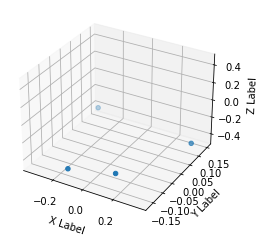

Time diff:  267.0
Footstep timestamp:  831618.0
Height check index:  5326
Height check timestamp:  831717.0

FL moving: 0.00533100000000003. FR moving: 0.08578400000000003
RL moving: 0.086808. RR moving: 0.008160999999999974

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394106. FR later: -0.308322
RR moving: -0.393887. RL moving: -0.399218

Coord FR: [0.134, -0.125, -0.394]. Coord FL: [0.357, 0.1, -0.394]. Coord RR: [-0.129, -0.165, -0.398]. Coord RL: [-0.351, 0.149, -0.419]

FR step_size: 0.44717399999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.45285499999999995.


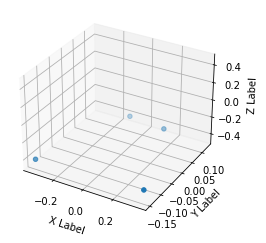

Time diff:  265.0
Footstep timestamp:  831885.0
Height check index:  5459
Height check timestamp:  831984.0

FL moving: 0.08701599999999998. FR moving: 0.010684000000000027
RL moving: 0.007199999999999984. RR moving: 0.08642

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386878. FR later: -0.397562
RR moving: -0.400013. RL moving: -0.312997

Coord FR: [0.36, -0.141, -0.387]. Coord FL: [0.136, 0.11, -0.4]. Coord RR: [-0.356, -0.148, -0.408]. Coord RL: [-0.125, 0.125, -0.411]

FR step_size: 0.445029. FL step_size: 0. RR step size: 0. RL step_size: 0.45013299999999995.


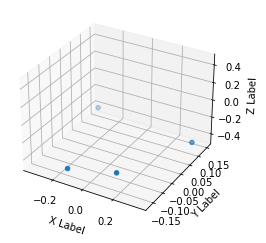

Time diff:  269.0
Footstep timestamp:  832150.0
Height check index:  5591
Height check timestamp:  832249.0

FL moving: 0.006288999999999989. FR moving: 0.08400800000000003
RL moving: 0.084918. RR moving: 0.008155999999999997

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394176. FR later: -0.310168
RR moving: -0.391934. RL moving: -0.398223

Coord FR: [0.136, -0.121, -0.394]. Coord FL: [0.357, 0.105, -0.392]. Coord RR: [-0.13, -0.165, -0.397]. Coord RL: [-0.349, 0.15, -0.418]

FR step_size: 0.44506499999999993. FL step_size: 0. RR step size: 0. RL step_size: 0.45000399999999996.


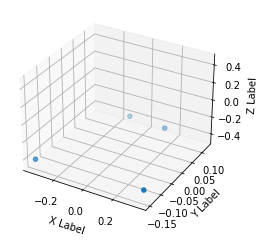

Time diff:  265.0
Footstep timestamp:  832419.0
Height check index:  5725
Height check timestamp:  832518.0

FL moving: 0.08819699999999997. FR moving: 0.009793000000000052
RL moving: 0.006956999999999991. RR moving: 0.08817900000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387962. FR later: -0.397755
RR moving: -0.400043. RL moving: -0.311846

Coord FR: [0.36, -0.141, -0.388]. Coord FL: [0.136, 0.114, -0.4]. Coord RR: [-0.357, -0.148, -0.407]. Coord RL: [-0.126, 0.125, -0.411]

FR step_size: 0.445549. FL step_size: 0. RR step size: 0. RL step_size: 0.450118.


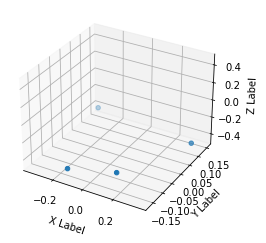

Time diff:  266.0
Footstep timestamp:  832684.0
Height check index:  5857
Height check timestamp:  832783.0

FL moving: 0.00668300000000005. FR moving: 0.08578000000000002
RL moving: 0.08640099999999995. RR moving: 0.008044999999999969

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394488. FR later: -0.308708
RR moving: -0.393182. RL moving: -0.399865

Coord FR: [0.135, -0.12, -0.394]. Coord FL: [0.357, 0.102, -0.393]. Coord RR: [-0.131, -0.165, -0.398]. Coord RL: [-0.35, 0.151, -0.419]

FR step_size: 0.44356300000000004. FL step_size: 0. RR step size: 0. RL step_size: 0.450065.


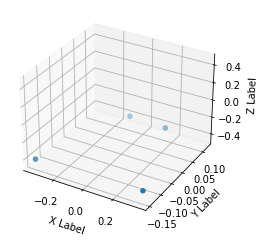

Time diff:  269.0
Footstep timestamp:  832950.0
Height check index:  5990
Height check timestamp:  833050.0

FL moving: 0.08730199999999999. FR moving: 0.01178800000000002
RL moving: 0.005836999999999981. RR moving: 0.08670500000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386387. FR later: -0.398175
RR moving: -0.400748. RL moving: -0.313446

Coord FR: [0.36, -0.144, -0.386]. Coord FL: [0.138, 0.112, -0.401]. Coord RR: [-0.356, -0.147, -0.406]. Coord RL: [-0.125, 0.121, -0.411]

FR step_size: 0.444252. FL step_size: 0. RR step size: 0. RL step_size: 0.4491.


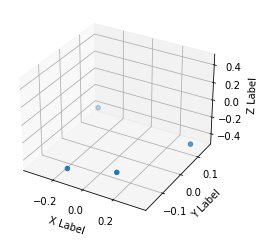

Time diff:  263.0
Footstep timestamp:  833219.0
Height check index:  6124
Height check timestamp:  833319.0

FL moving: 0.005405000000000049. FR moving: 0.08822800000000003
RL moving: 0.089941. RR moving: 0.009552000000000005

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395201. FR later: -0.306973
RR moving: -0.394763. RL moving: -0.400168

Coord FR: [0.133, -0.118, -0.395]. Coord FL: [0.356, 0.1, -0.395]. Coord RR: [-0.133, -0.165, -0.397]. Coord RL: [-0.351, 0.154, -0.419]

FR step_size: 0.443764. FL step_size: 0. RR step size: 0. RL step_size: 0.45210599999999995.


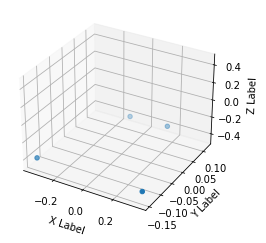

Time diff:  4873.0


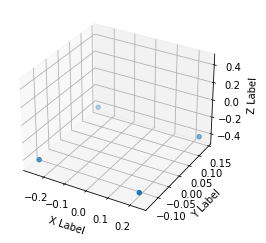

Time diff:  263.0
Footstep timestamp:  838355.0
Height check index:  6350
Height check timestamp:  838454.0

FL moving: 0.09341100000000002. FR moving: 0.0014440000000000008
RL moving: 0.002016999999999991. RR moving: 0.09676500000000005

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.41126. FR later: -0.412704
RR moving: -0.4097. RL moving: -0.316289

Coord FR: [0.221, -0.136, -0.411]. Coord FL: [0.234, 0.139, -0.41]. Coord RR: [-0.248, -0.132, -0.413]. Coord RL: [-0.261, 0.141, -0.413]

FR step_size: 0.06928599999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.06417400000000001.


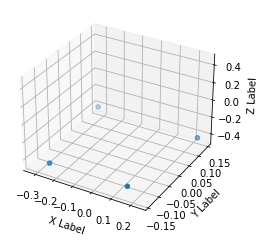

Time diff:  261.0
Footstep timestamp:  838618.0
Height check index:  6481
Height check timestamp:  838717.0

FL moving: 0.0005809999999999982. FR moving: 0.08729500000000001
RL moving: 0.08257799999999998. RR moving: 0.0012030000000000096

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.403863. FR later: -0.316568
RR moving: -0.403229. RL moving: -0.40381

Coord FR: [0.153, -0.133, -0.404]. Coord FL: [0.236, 0.133, -0.403]. Coord RR: [-0.248, -0.14, -0.401]. Coord RL: [-0.325, 0.144, -0.408]

FR step_size: 0.2979844. FL step_size: 0. RR step size: 0. RL step_size: 0.307537.


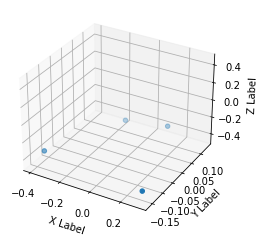

Time diff:  273.0
Footstep timestamp:  838879.0
Height check index:  6611
Height check timestamp:  838978.0

FL moving: 0.07885200000000003. FR moving: 0.007979999999999987
RL moving: 0.008668999999999982. RR moving: 0.07241000000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.382006. FR later: -0.389986
RR moving: -0.398697. RL moving: -0.319845

Coord FR: [0.309, -0.16, -0.382]. Coord FL: [0.094, 0.134, -0.399]. Coord RR: [-0.395, -0.121, -0.397]. Coord RL: [-0.164, 0.108, -0.403]

FR step_size: 0.48011639999999994. FL step_size: 0. RR step size: 0. RL step_size: 0.46052000000000004.


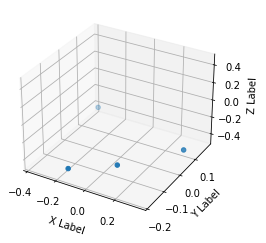

Time diff:  273.0
Footstep timestamp:  839152.0
Height check index:  6747
Height check timestamp:  839251.0

FL moving: 0.011996000000000007. FR moving: 0.08277400000000001
RL moving: 0.08278800000000003. RR moving: 0.010595000000000021

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393187. FR later: -0.310413
RR moving: -0.38281. RL moving: -0.394806

Coord FR: [0.087, -0.095, -0.393]. Coord FL: [0.352, 0.072, -0.383]. Coord RR: [-0.144, -0.182, -0.395]. Coord RL: [-0.373, 0.178, -0.414]

FR step_size: 0.4861439999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.456029.


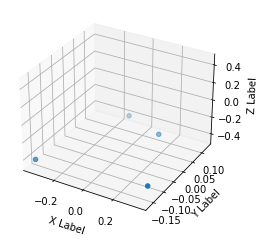

Time diff:  261.0
Footstep timestamp:  839425.0
Height check index:  6883
Height check timestamp:  839524.0

FL moving: 0.090972. FR moving: 0.011531000000000013
RL moving: 0.007864000000000038. RR moving: 0.08927099999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385668. FR later: -0.397199
RR moving: -0.39614. RL moving: -0.305168

Coord FR: [0.361, -0.139, -0.386]. Coord FL: [0.14, 0.081, -0.396]. Coord RR: [-0.362, -0.165, -0.41]. Coord RL: [-0.135, 0.128, -0.408]

FR step_size: 0.43000099999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.459346.


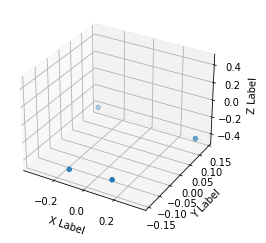

Time diff:  272.0
Footstep timestamp:  839686.0
Height check index:  7013
Height check timestamp:  839785.0

FL moving: 0.005913000000000002. FR moving: 0.08235100000000001
RL moving: 0.08206199999999997. RR moving: 0.009134999999999949

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394536. FR later: -0.312185
RR moving: -0.388335. RL moving: -0.394248

Coord FR: [0.143, -0.133, -0.395]. Coord FL: [0.352, 0.117, -0.388]. Coord RR: [-0.127, -0.143, -0.4]. Coord RL: [-0.359, 0.139, -0.414]

FR step_size: 0.43816599999999994. FL step_size: 0. RR step size: 0. RL step_size: 0.45968299999999995.


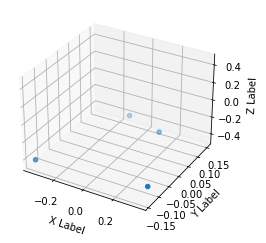

Time diff:  261.0
Footstep timestamp:  839958.0
Height check index:  7149
Height check timestamp:  840058.0

FL moving: 0.09062399999999998. FR moving: 0.008093000000000017
RL moving: 0.009365000000000012. RR moving: 0.09199400000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.392187. FR later: -0.40028
RR moving: -0.395746. RL moving: -0.305122

Coord FR: [0.358, -0.115, -0.392]. Coord FL: [0.129, 0.113, -0.396]. Coord RR: [-0.357, -0.141, -0.414]. Coord RL: [-0.129, 0.15, -0.405]

FR step_size: 0.44930799999999993. FL step_size: 0. RR step size: 0. RL step_size: 0.451253.


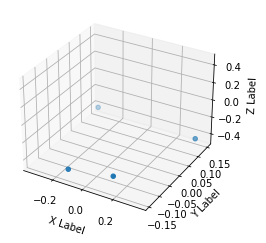

Time diff:  271.0
Footstep timestamp:  840219.0
Height check index:  7279
Height check timestamp:  840319.0

FL moving: 0.007384999999999975. FR moving: 0.083042
RL moving: 0.08207900000000001. RR moving: 0.00853200000000004

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396397. FR later: -0.313355
RR moving: -0.387373. RL moving: -0.394758

Coord FR: [0.137, -0.119, -0.396]. Coord FL: [0.358, 0.124, -0.387]. Coord RR: [-0.125, -0.144, -0.402]. Coord RL: [-0.349, 0.148, -0.414]

FR step_size: 0.44253599999999993. FL step_size: 0. RR step size: 0. RL step_size: 0.44951199999999997.


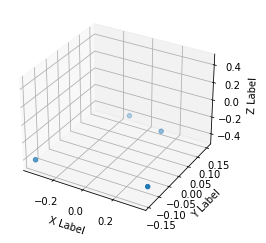

Time diff:  263.0
Footstep timestamp:  840490.0
Height check index:  7414
Height check timestamp:  840590.0

FL moving: 0.087534. FR moving: 0.007931999999999995
RL moving: 0.009069999999999967. RR moving: 0.09012899999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.392939. FR later: -0.400871
RR moving: -0.395886. RL moving: -0.308352

Coord FR: [0.358, -0.116, -0.393]. Coord FL: [0.136, 0.12, -0.396]. Coord RR: [-0.354, -0.142, -0.414]. Coord RL: [-0.128, 0.151, -0.406]

FR step_size: 0.440277. FL step_size: 0. RR step size: 0. RL step_size: 0.44579199999999997.


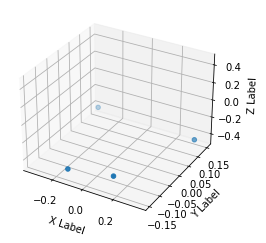

Time diff:  271.0
Footstep timestamp:  840753.0
Height check index:  7545
Height check timestamp:  840853.0

FL moving: 0.007799. FR moving: 0.08346799999999999
RL moving: 0.083648. RR moving: 0.007848999999999995

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395625. FR later: -0.312157
RR moving: -0.388549. RL moving: -0.396348

Coord FR: [0.137, -0.12, -0.396]. Coord FL: [0.356, 0.121, -0.389]. Coord RR: [-0.127, -0.146, -0.401]. Coord RL: [-0.347, 0.15, -0.414]

FR step_size: 0.44354. FL step_size: 0. RR step size: 0. RL step_size: 0.450052.


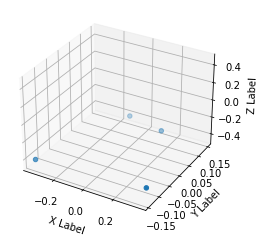

Time diff:  265.0
Footstep timestamp:  841024.0
Height check index:  7680
Height check timestamp:  841124.0

FL moving: 0.089366. FR moving: 0.008126999999999995
RL moving: 0.008272000000000002. RR moving: 0.09077800000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.391658. FR later: -0.399785
RR moving: -0.39748. RL moving: -0.308114

Coord FR: [0.358, -0.122, -0.392]. Coord FL: [0.133, 0.117, -0.397]. Coord RR: [-0.357, -0.141, -0.411]. Coord RL: [-0.127, 0.145, -0.408]

FR step_size: 0.44268699999999994. FL step_size: 0. RR step size: 0. RL step_size: 0.44482499999999997.


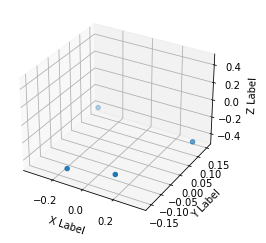

Time diff:  267.0
Footstep timestamp:  841289.0
Height check index:  7812
Height check timestamp:  841389.0

FL moving: 0.006066000000000016. FR moving: 0.08717199999999997
RL moving: 0.08802900000000002. RR moving: 0.008074000000000026

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395053. FR later: -0.307881
RR moving: -0.392924. RL moving: -0.39899

Coord FR: [0.137, -0.12, -0.395]. Coord FL: [0.355, 0.111, -0.393]. Coord RR: [-0.132, -0.155, -0.399]. Coord RL: [-0.347, 0.151, -0.417]

FR step_size: 0.44048. FL step_size: 0. RR step size: 0. RL step_size: 0.444504.


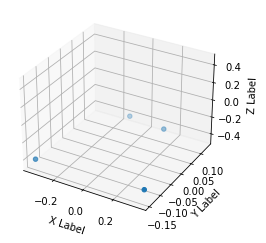

Time diff:  267.0
Footstep timestamp:  841556.0
Height check index:  7945
Height check timestamp:  841656.0

FL moving: 0.08803100000000003. FR moving: 0.010231000000000046
RL moving: 0.006511999999999962. RR moving: 0.08848

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.38891. FR later: -0.399141
RR moving: -0.39954. RL moving: -0.311509

Coord FR: [0.358, -0.137, -0.389]. Coord FL: [0.135, 0.115, -0.4]. Coord RR: [-0.357, -0.146, -0.407]. Coord RL: [-0.127, 0.131, -0.41]

FR step_size: 0.445073. FL step_size: 0. RR step size: 0. RL step_size: 0.451277.


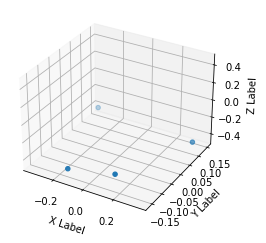

Time diff:  267.0
Footstep timestamp:  841823.0
Height check index:  8078
Height check timestamp:  841923.0

FL moving: 0.003823000000000021. FR moving: 0.08834999999999998
RL moving: 0.089972. RR moving: 0.008767999999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39482. FR later: -0.30647
RR moving: -0.39408. RL moving: -0.397903

Coord FR: [0.133, -0.123, -0.395]. Coord FL: [0.355, 0.107, -0.394]. Coord RR: [-0.131, -0.159, -0.398]. Coord RL: [-0.352, 0.148, -0.417]

FR step_size: 0.44600699999999993. FL step_size: 0. RR step size: 0. RL step_size: 0.453157.


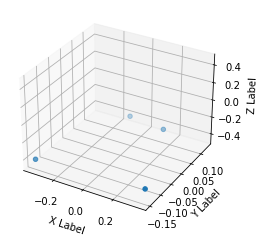

Time diff:  267.0
Footstep timestamp:  842090.0
Height check index:  8211
Height check timestamp:  842190.0

FL moving: 0.08806199999999997. FR moving: 0.010072999999999999
RL moving: 0.007039999999999991. RR moving: 0.08868899999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390213. FR later: -0.400286
RR moving: -0.400076. RL moving: -0.312014

Coord FR: [0.359, -0.135, -0.39]. Coord FL: [0.135, 0.114, -0.4]. Coord RR: [-0.357, -0.148, -0.408]. Coord RL: [-0.125, 0.132, -0.41]

FR step_size: 0.443789. FL step_size: 0. RR step size: 0. RL step_size: 0.449352.


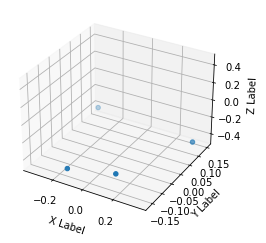

Time diff:  267.0
Footstep timestamp:  842357.0
Height check index:  8343
Height check timestamp:  842456.0

FL moving: 0.00550299999999998. FR moving: 0.08507500000000001
RL moving: 0.08640199999999998. RR moving: 0.008682999999999996

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395699. FR later: -0.310624
RR moving: -0.394361. RL moving: -0.399864

Coord FR: [0.136, -0.122, -0.396]. Coord FL: [0.356, 0.108, -0.394]. Coord RR: [-0.132, -0.161, -0.398]. Coord RL: [-0.349, 0.149, -0.417]

FR step_size: 0.44064899999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.44722799999999996.


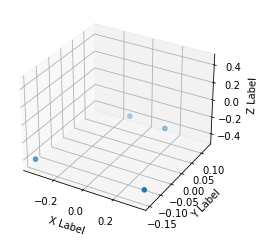

Time diff:  267.0
Footstep timestamp:  842624.0
Height check index:  8476
Height check timestamp:  842723.0

FL moving: 0.08845699999999995. FR moving: 0.00959099999999996
RL moving: 0.006620999999999988. RR moving: 0.087115

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390707. FR later: -0.400298
RR moving: -0.400873. RL moving: -0.312416

Coord FR: [0.358, -0.138, -0.391]. Coord FL: [0.137, 0.116, -0.401]. Coord RR: [-0.357, -0.147, -0.407]. Coord RL: [-0.127, 0.128, -0.41]

FR step_size: 0.440706. FL step_size: 0. RR step size: 0. RL step_size: 0.44526.


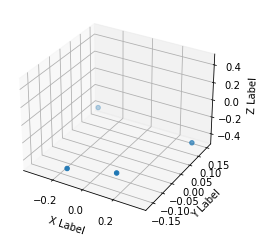

Time diff:  265.0
Footstep timestamp:  842891.0
Height check index:  8609
Height check timestamp:  842990.0

FL moving: 0.004145999999999983. FR moving: 0.08686299999999997
RL moving: 0.08725. RR moving: 0.008640999999999954

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395945. FR later: -0.309082
RR moving: -0.396119. RL moving: -0.400265

Coord FR: [0.135, -0.12, -0.396]. Coord FL: [0.355, 0.105, -0.396]. Coord RR: [-0.133, -0.164, -0.398]. Coord RL: [-0.348, 0.15, -0.417]

FR step_size: 0.440312. FL step_size: 0. RR step size: 0. RL step_size: 0.44579099999999994.


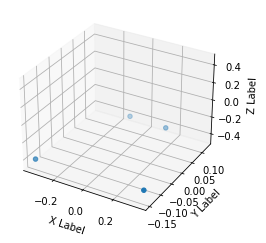

Time diff:  269.0
Footstep timestamp:  843156.0
Height check index:  8741
Height check timestamp:  843255.0

FL moving: 0.08707899999999996. FR moving: 0.009886000000000006
RL moving: 0.006081000000000003. RR moving: 0.085422

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389892. FR later: -0.399778
RR moving: -0.401898. RL moving: -0.314819

Coord FR: [0.358, -0.14, -0.39]. Coord FL: [0.138, 0.117, -0.402]. Coord RR: [-0.356, -0.147, -0.406]. Coord RL: [-0.125, 0.125, -0.411]

FR step_size: 0.440276. FL step_size: 0. RR step size: 0. RL step_size: 0.444457.


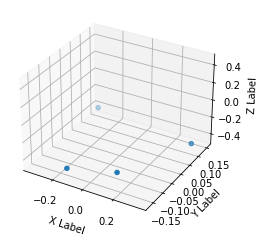

Time diff:  265.0
Footstep timestamp:  843425.0
Height check index:  8875
Height check timestamp:  843524.0

FL moving: 0.004652999999999963. FR moving: 0.08662900000000001
RL moving: 0.08829999999999999. RR moving: 0.009809000000000012

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395526. FR later: -0.308897
RR moving: -0.397591. RL moving: -0.402244

Coord FR: [0.134, -0.118, -0.396]. Coord FL: [0.354, 0.102, -0.398]. Coord RR: [-0.134, -0.165, -0.397]. Coord RL: [-0.347, 0.151, -0.418]

FR step_size: 0.439289. FL step_size: 0. RR step size: 0. RL step_size: 0.44567199999999996.


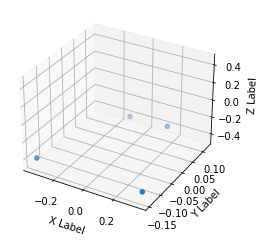

Time diff:  268.0
Footstep timestamp:  843690.0
Height check index:  9007
Height check timestamp:  843789.0

FL moving: 0.08733400000000002. FR moving: 0.007793999999999968
RL moving: 0.005288000000000015. RR moving: 0.08496899999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390691. FR later: -0.398485
RR moving: -0.401965. RL moving: -0.314631

Coord FR: [0.357, -0.145, -0.391]. Coord FL: [0.137, 0.12, -0.402]. Coord RR: [-0.358, -0.14, -0.406]. Coord RL: [-0.125, 0.119, -0.411]

FR step_size: 0.44155999999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.444613.


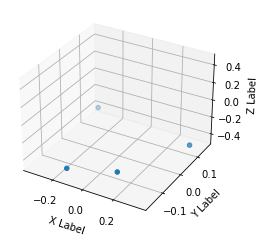

Time diff:  265.0
Footstep timestamp:  843958.0
Height check index:  9141
Height check timestamp:  844058.0

FL moving: 0.005271000000000026. FR moving: 0.088482
RL moving: 0.08937600000000001. RR moving: 0.009704999999999964

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395882. FR later: -0.3074
RR moving: -0.395949. RL moving: -0.40122

Coord FR: [0.132, -0.116, -0.396]. Coord FL: [0.353, 0.096, -0.396]. Coord RR: [-0.135, -0.166, -0.397]. Coord RL: [-0.347, 0.156, -0.417]

FR step_size: 0.440311. FL step_size: 0. RR step size: 0. RL step_size: 0.44504999999999995.


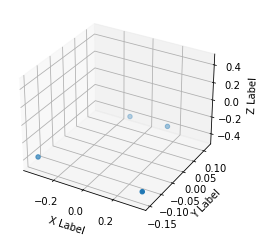

Time diff:  269.0
Footstep timestamp:  844223.0
Height check index:  9273
Height check timestamp:  844323.0

FL moving: 0.088949. FR moving: 0.01047300000000001
RL moving: 0.0061650000000000316. RR moving: 0.08707499999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388963. FR later: -0.399436
RR moving: -0.401611. RL moving: -0.312662

Coord FR: [0.358, -0.148, -0.389]. Coord FL: [0.138, 0.115, -0.402]. Coord RR: [-0.358, -0.138, -0.406]. Coord RL: [-0.125, 0.114, -0.411]

FR step_size: 0.441231. FL step_size: 0. RR step size: 0. RL step_size: 0.44386.


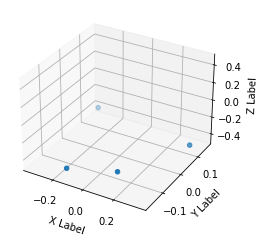

Time diff:  265.0
Footstep timestamp:  844492.0
Height check index:  9407
Height check timestamp:  844592.0

FL moving: 0.0049300000000000455. FR moving: 0.08815299999999998
RL moving: 0.08973499999999995. RR moving: 0.008738000000000024

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396134. FR later: -0.307981
RR moving: -0.39724. RL moving: -0.40217

Coord FR: [0.131, -0.115, -0.396]. Coord FL: [0.352, 0.095, -0.397]. Coord RR: [-0.137, -0.166, -0.397]. Coord RL: [-0.348, 0.154, -0.418]

FR step_size: 0.43864299999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.444163.


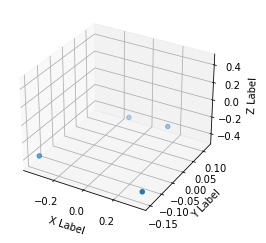

Time diff:  41327.0


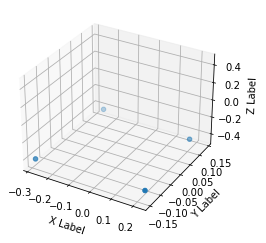

Time diff:  260.0
Footstep timestamp:  886084.0
Height check index:  9717
Height check timestamp:  886183.0

FL moving: 0.0009899999999999909. FR moving: 0.09503
RL moving: 0.09298699999999999. RR moving: 0.0020990000000000175

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.407011. FR later: -0.311981
RR moving: -0.413839. RL moving: -0.412849

Coord FR: [0.221, -0.136, -0.407]. Coord FL: [0.194, 0.117, -0.414]. Coord RR: [-0.283, -0.149, -0.404]. Coord RL: [-0.255, 0.14, -0.419]

FR step_size: 0.102658. FL step_size: 0. RR step size: 0. RL step_size: 0.12101600000000001.


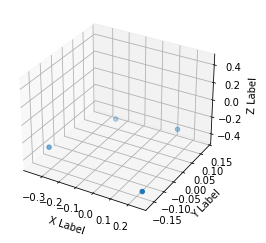

Time diff:  267.0
Footstep timestamp:  886344.0
Height check index:  9847
Height check timestamp:  886444.0

FL moving: 0.08260499999999998. FR moving: 0.0024679999999999702
RL moving: 0.002593999999999985. RR moving: 0.08163099999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387311. FR later: -0.389779
RR moving: -0.402177. RL moving: -0.319572

Coord FR: [0.252, -0.169, -0.387]. Coord FL: [0.122, 0.135, -0.402]. Coord RR: [-0.367, -0.107, -0.399]. Coord RL: [-0.218, 0.103, -0.409]

FR step_size: 0.3889213. FL step_size: 0. RR step size: 0. RL step_size: 0.38258.


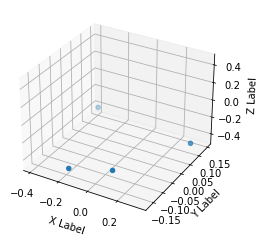

Time diff:  273.0
Footstep timestamp:  886611.0
Height check index:  9980
Height check timestamp:  886711.0

FL moving: 0.01062200000000002. FR moving: 0.07975399999999999
RL moving: 0.081704. RR moving: 0.01156600000000002

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.389967. FR later: -0.310213
RR moving: -0.3853. RL moving: -0.395922

Coord FR: [0.075, -0.119, -0.39]. Coord FL: [0.334, 0.094, -0.385]. Coord RR: [-0.159, -0.166, -0.391]. Coord RL: [-0.393, 0.147, -0.414]

FR step_size: 0.49515699999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.478723.


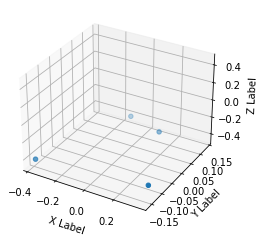

Time diff:  265.0
Footstep timestamp:  886884.0
Height check index:  10115
Height check timestamp:  886983.0

FL moving: 0.087754. FR moving: 0.012278999999999984
RL moving: 0.00929000000000002. RR moving: 0.08716599999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385228. FR later: -0.397507
RR moving: -0.397387. RL moving: -0.309633

Coord FR: [0.36, -0.128, -0.385]. Coord FL: [0.123, 0.1, -0.397]. Coord RR: [-0.375, -0.157, -0.407]. Coord RL: [-0.131, 0.136, -0.408]

FR step_size: 0.448496. FL step_size: 0. RR step size: 0. RL step_size: 0.465051.


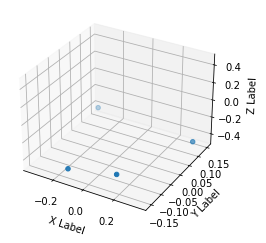

Time diff:  265.0
Footstep timestamp:  887149.0
Height check index:  10247
Height check timestamp:  887248.0

FL moving: 0.005881999999999998. FR moving: 0.08565600000000001
RL moving: 0.08453099999999997. RR moving: 0.008857999999999977

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393277. FR later: -0.307621
RR moving: -0.392529. RL moving: -0.398411

Coord FR: [0.141, -0.119, -0.393]. Coord FL: [0.352, 0.11, -0.393]. Coord RR: [-0.13, -0.155, -0.398]. Coord RL: [-0.351, 0.149, -0.418]

FR step_size: 0.434344. FL step_size: 0. RR step size: 0. RL step_size: 0.451074.


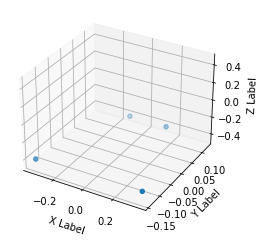

Time diff:  269.0
Footstep timestamp:  887414.0
Height check index:  10379
Height check timestamp:  887514.0

FL moving: 0.08481. FR moving: 0.011149999999999993
RL moving: 0.007828000000000002. RR moving: 0.085532

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.384952. FR later: -0.396102
RR moving: -0.399463. RL moving: -0.314653

Coord FR: [0.36, -0.141, -0.385]. Coord FL: [0.137, 0.12, -0.399]. Coord RR: [-0.353, -0.14, -0.408]. Coord RL: [-0.123, 0.124, -0.41]

FR step_size: 0.447612. FL step_size: 0. RR step size: 0. RL step_size: 0.445974.


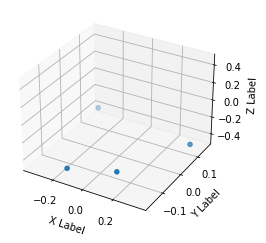

Time diff:  264.0
Footstep timestamp:  887683.0
Height check index:  10513
Height check timestamp:  887782.0

FL moving: 0.005964000000000025. FR moving: 0.08674799999999999
RL moving: 0.088009. RR moving: 0.009762000000000048

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393391. FR later: -0.306643
RR moving: -0.393067. RL moving: -0.399031

Coord FR: [0.132, -0.117, -0.393]. Coord FL: [0.357, 0.098, -0.393]. Coord RR: [-0.134, -0.166, -0.396]. Coord RL: [-0.35, 0.155, -0.42]

FR step_size: 0.44602299999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.45628199999999997.


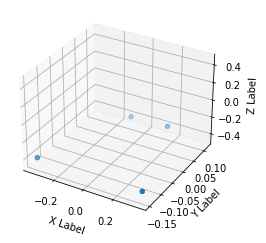

Time diff:  268.0
Footstep timestamp:  887947.0
Height check index:  10645
Height check timestamp:  888047.0

FL moving: 0.08687800000000001. FR moving: 0.010941000000000034
RL moving: 0.0072049999999999614. RR moving: 0.08407999999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.384818. FR later: -0.395759
RR moving: -0.401027. RL moving: -0.314149

Coord FR: [0.36, -0.147, -0.385]. Coord FL: [0.139, 0.115, -0.401]. Coord RR: [-0.361, -0.14, -0.407]. Coord RL: [-0.12, 0.115, -0.412]

FR step_size: 0.442924. FL step_size: 0. RR step size: 0. RL step_size: 0.451376.


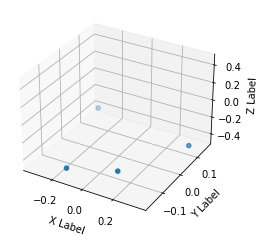

Time diff:  264.0
Footstep timestamp:  888215.0
Height check index:  10778
Height check timestamp:  888314.0

FL moving: 0.0070290000000000075. FR moving: 0.08522000000000002
RL moving: 0.08636700000000003. RR moving: 0.008799999999999975

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39373. FR later: -0.30851
RR moving: -0.393119. RL moving: -0.400148

Coord FR: [0.134, -0.113, -0.394]. Coord FL: [0.356, 0.093, -0.393]. Coord RR: [-0.134, -0.167, -0.396]. Coord RL: [-0.344, 0.158, -0.421]

FR step_size: 0.44034799999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.45042499999999996.


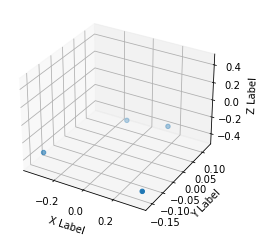

Time diff:  269.0
Footstep timestamp:  888479.0
Height check index:  10910
Height check timestamp:  888579.0

FL moving: 0.08427600000000002. FR moving: 0.011075999999999975
RL moving: 0.007413000000000003. RR moving: 0.08556399999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385097. FR later: -0.396173
RR moving: -0.400495. RL moving: -0.316219

Coord FR: [0.359, -0.159, -0.385]. Coord FL: [0.141, 0.124, -0.4]. Coord RR: [-0.362, -0.125, -0.408]. Coord RL: [-0.121, 0.103, -0.411]

FR step_size: 0.446264. FL step_size: 0. RR step size: 0. RL step_size: 0.459101.


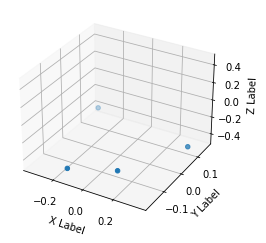

Time diff:  265.0
Footstep timestamp:  888748.0
Height check index:  11044
Height check timestamp:  888848.0

FL moving: 0.0070109999999999895. FR moving: 0.08627200000000002
RL moving: 0.08762400000000004. RR moving: 0.009421000000000013

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394716. FR later: -0.308444
RR moving: -0.394073. RL moving: -0.401084

Coord FR: [0.128, -0.119, -0.395]. Coord FL: [0.356, 0.084, -0.394]. Coord RR: [-0.134, -0.176, -0.396]. Coord RL: [-0.352, 0.157, -0.42]

FR step_size: 0.447959. FL step_size: 0. RR step size: 0. RL step_size: 0.45550199999999996.


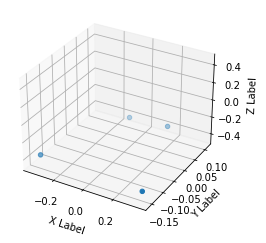

Time diff:  7580.0


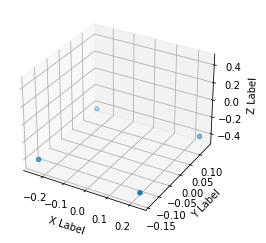

Time diff:  263.0
Footstep timestamp:  896593.0
Height check index:  11343
Height check timestamp:  896693.0

FL moving: 0.096219. FR moving: 0.00037399999999998546
RL moving: 0.0006849999999999912. RR moving: 0.10019899999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.40855. FR later: -0.408924
RR moving: -0.411114. RL moving: -0.314895

Coord FR: [0.226, -0.14, -0.409]. Coord FL: [0.236, 0.136, -0.411]. Coord RR: [-0.246, -0.136, -0.412]. Coord RL: [-0.256, 0.13, -0.419]

FR step_size: 0.07776899999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.07040099999999999.


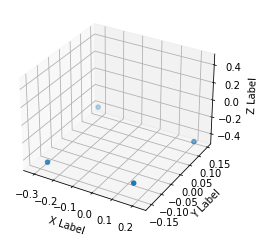

Time diff:  259.0
Footstep timestamp:  896856.0
Height check index:  11474
Height check timestamp:  896956.0

FL moving: 0.00013299999999999423. FR moving: 0.089389
RL moving: 0.08351399999999998. RR moving: 0.0005170000000000452

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.400828. FR later: -0.311439
RR moving: -0.406825. RL moving: -0.406958

Coord FR: [0.158, -0.13, -0.401]. Coord FL: [0.226, 0.115, -0.407]. Coord RR: [-0.254, -0.156, -0.397]. Coord RL: [-0.318, 0.147, -0.411]

FR step_size: 0.2736206. FL step_size: 0. RR step size: 0. RL step_size: 0.29037999999999997.


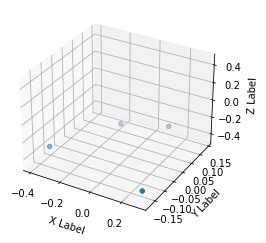

Time diff:  273.0
Footstep timestamp:  897115.0
Height check index:  11603
Height check timestamp:  897215.0

FL moving: 0.07662799999999997. FR moving: 0.007519999999999971
RL moving: 0.01098300000000002. RR moving: 0.07205699999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.38085. FR later: -0.38837
RR moving: -0.399151. RL moving: -0.322523

Coord FR: [0.302, -0.175, -0.381]. Coord FL: [0.096, 0.14, -0.399]. Coord RR: [-0.395, -0.108, -0.397]. Coord RL: [-0.169, 0.089, -0.403]

FR step_size: 0.4673316. FL step_size: 0. RR step size: 0. RL step_size: 0.470089.


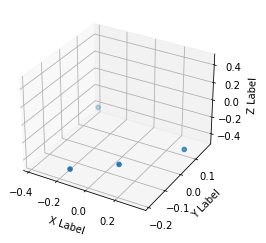

Time diff:  273.0
Footstep timestamp:  897388.0
Height check index:  11738
Height check timestamp:  897487.0

FL moving: 0.01278600000000002. FR moving: 0.084447
RL moving: 0.07740599999999997. RR moving: 0.006329000000000029

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392152. FR later: -0.307705
RR moving: -0.383994. RL moving: -0.39678

Coord FR: [0.088, -0.096, -0.392]. Coord FL: [0.349, 0.073, -0.384]. Coord RR: [-0.138, -0.19, -0.394]. Coord RL: [-0.382, 0.177, -0.414]

FR step_size: 0.48712599999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.474271.


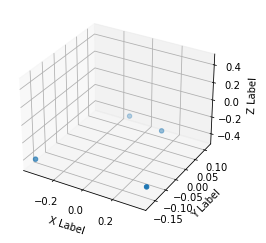

Time diff:  263.0
Footstep timestamp:  897661.0
Height check index:  11874
Height check timestamp:  897760.0

FL moving: 0.089142. FR moving: 0.013177999999999968
RL moving: 0.006571999999999967. RR moving: 0.08763300000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.383006. FR later: -0.396184
RR moving: -0.398785. RL moving: -0.309643

Coord FR: [0.363, -0.153, -0.383]. Coord FL: [0.137, 0.085, -0.399]. Coord RR: [-0.358, -0.173, -0.407]. Coord RL: [-0.128, 0.112, -0.41]

FR step_size: 0.441442. FL step_size: 0. RR step size: 0. RL step_size: 0.463913.


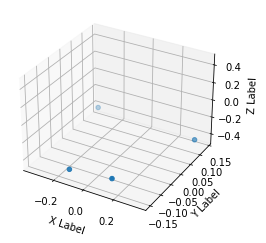

Time diff:  271.0
Footstep timestamp:  897924.0
Height check index:  12005
Height check timestamp:  898023.0

FL moving: 0.005852999999999997. FR moving: 0.08391900000000002
RL moving: 0.083208. RR moving: 0.008036000000000043

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394007. FR later: -0.310088
RR moving: -0.391734. RL moving: -0.397587

Coord FR: [0.14, -0.136, -0.394]. Coord FL: [0.356, 0.111, -0.392]. Coord RR: [-0.124, -0.15, -0.399]. Coord RL: [-0.358, 0.138, -0.416]

FR step_size: 0.44634299999999993. FL step_size: 0. RR step size: 0. RL step_size: 0.464347.


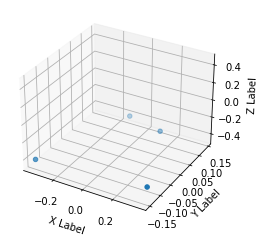

Time diff:  265.0
Footstep timestamp:  898195.0
Height check index:  12140
Height check timestamp:  898294.0

FL moving: 0.08827999999999997. FR moving: 0.00877699999999998
RL moving: 0.007642000000000038. RR moving: 0.08861200000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390944. FR later: -0.399721
RR moving: -0.398935. RL moving: -0.310655

Coord FR: [0.361, -0.125, -0.391]. Coord FL: [0.131, 0.111, -0.399]. Coord RR: [-0.355, -0.148, -0.41]. Coord RL: [-0.125, 0.142, -0.409]

FR step_size: 0.452792. FL step_size: 0. RR step size: 0. RL step_size: 0.45016999999999996.


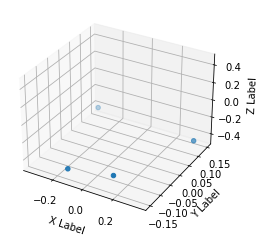

Time diff:  268.0
Footstep timestamp:  898460.0
Height check index:  12272
Height check timestamp:  898559.0

FL moving: 0.005680000000000018. FR moving: 0.08562399999999998
RL moving: 0.086588. RR moving: 0.007583000000000006

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394681. FR later: -0.309057
RR moving: -0.392988. RL moving: -0.398668

Coord FR: [0.135, -0.122, -0.395]. Coord FL: [0.358, 0.115, -0.393]. Coord RR: [-0.128, -0.15, -0.399]. Coord RL: [-0.349, 0.148, -0.417]

FR step_size: 0.446926. FL step_size: 0. RR step size: 0. RL step_size: 0.45231299999999997.


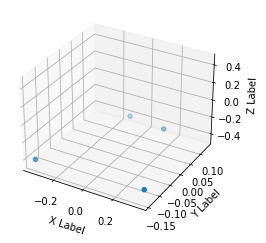

Time diff:  265.0
Footstep timestamp:  898728.0
Height check index:  12406
Height check timestamp:  898828.0

FL moving: 0.08981699999999998. FR moving: 0.009703000000000017
RL moving: 0.006960999999999995. RR moving: 0.09103899999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389248. FR later: -0.398951
RR moving: -0.39935. RL moving: -0.309533

Coord FR: [0.36, -0.133, -0.389]. Coord FL: [0.136, 0.118, -0.399]. Coord RR: [-0.357, -0.142, -0.409]. Coord RL: [-0.125, 0.134, -0.41]

FR step_size: 0.445748. FL step_size: 0. RR step size: 0. RL step_size: 0.451909.


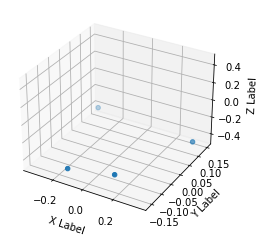

Time diff:  267.0
Footstep timestamp:  898993.0
Height check index:  12538
Height check timestamp:  899093.0

FL moving: 0.006647000000000014. FR moving: 0.08687800000000001
RL moving: 0.08730399999999999. RR moving: 0.008110000000000006

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394262. FR later: -0.307384
RR moving: -0.393474. RL moving: -0.400121

Coord FR: [0.136, -0.124, -0.394]. Coord FL: [0.357, 0.109, -0.393]. Coord RR: [-0.13, -0.157, -0.397]. Coord RL: [-0.35, 0.149, -0.418]

FR step_size: 0.44573699999999994. FL step_size: 0. RR step size: 0. RL step_size: 0.455365.


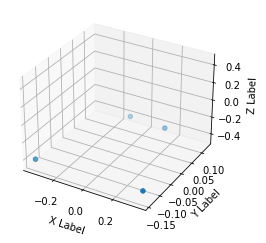

Time diff:  269.0
Footstep timestamp:  899260.0
Height check index:  12671
Height check timestamp:  899360.0

FL moving: 0.08835900000000002. FR moving: 0.010160999999999976
RL moving: 0.006809999999999983. RR moving: 0.08879599999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387959. FR later: -0.39812
RR moving: -0.400911. RL moving: -0.312552

Coord FR: [0.361, -0.14, -0.388]. Coord FL: [0.136, 0.116, -0.401]. Coord RR: [-0.358, -0.143, -0.407]. Coord RL: [-0.123, 0.126, -0.412]

FR step_size: 0.44386699999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.44789799999999996.


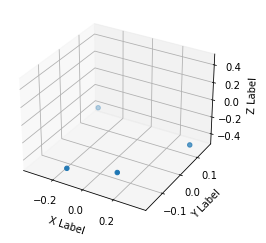

Time diff:  263.0
Footstep timestamp:  899529.0
Height check index:  12805
Height check timestamp:  899629.0

FL moving: 0.004265000000000019. FR moving: 0.09044999999999997
RL moving: 0.09134200000000003. RR moving: 0.009058999999999984

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395511. FR later: -0.305061
RR moving: -0.39626. RL moving: -0.400525

Coord FR: [0.135, -0.117, -0.396]. Coord FL: [0.354, 0.099, -0.396]. Coord RR: [-0.135, -0.165, -0.397]. Coord RL: [-0.348, 0.158, -0.419]

FR step_size: 0.438357. FL step_size: 0. RR step size: 0. RL step_size: 0.447472.


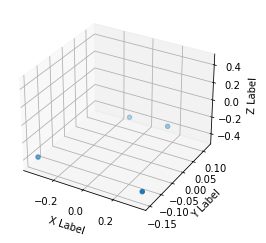

Time diff:  269.0
Footstep timestamp:  899792.0
Height check index:  12936
Height check timestamp:  899892.0

FL moving: 0.08723599999999998. FR moving: 0.011178999999999994
RL moving: 0.007086000000000037. RR moving: 0.08703699999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387677. FR later: -0.398856
RR moving: -0.401285. RL moving: -0.314049

Coord FR: [0.359, -0.148, -0.388]. Coord FL: [0.14, 0.118, -0.401]. Coord RR: [-0.358, -0.138, -0.407]. Coord RL: [-0.123, 0.114, -0.412]

FR step_size: 0.442227. FL step_size: 0. RR step size: 0. RL step_size: 0.451698.


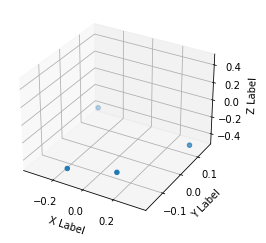

Time diff:  263.0
Footstep timestamp:  900061.0
Height check index:  13070
Height check timestamp:  900161.0

FL moving: 0.005062999999999984. FR moving: 0.08829999999999999
RL moving: 0.089113. RR moving: 0.008965

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395636. FR later: -0.307336
RR moving: -0.396228. RL moving: -0.401291

Coord FR: [0.132, -0.118, -0.396]. Coord FL: [0.355, 0.095, -0.396]. Coord RR: [-0.134, -0.166, -0.397]. Coord RL: [-0.351, 0.155, -0.419]

FR step_size: 0.443631. FL step_size: 0. RR step size: 0. RL step_size: 0.453698.


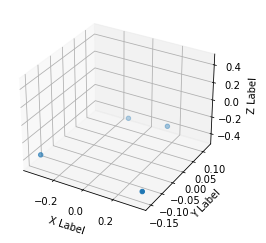

Time diff:  269.0
Footstep timestamp:  900324.0
Height check index:  13201
Height check timestamp:  900424.0

FL moving: 0.08518500000000001. FR moving: 0.01210300000000003
RL moving: 0.007406999999999997. RR moving: 0.08514

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387163. FR later: -0.399266
RR moving: -0.401309. RL moving: -0.316124

Coord FR: [0.36, -0.153, -0.387]. Coord FL: [0.139, 0.12, -0.401]. Coord RR: [-0.358, -0.132, -0.407]. Coord RL: [-0.122, 0.11, -0.411]

FR step_size: 0.44381799999999993. FL step_size: 0. RR step size: 0. RL step_size: 0.45308099999999996.


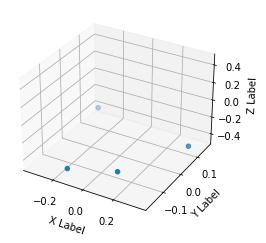

Time diff:  265.0
Footstep timestamp:  900593.0
Height check index:  13335
Height check timestamp:  900693.0

FL moving: 0.006011999999999962. FR moving: 0.08718900000000002
RL moving: 0.08706800000000003. RR moving: 0.008290999999999993

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397028. FR later: -0.309839
RR moving: -0.396033. RL moving: -0.402045

Coord FR: [0.131, -0.118, -0.397]. Coord FL: [0.354, 0.09, -0.396]. Coord RR: [-0.134, -0.171, -0.398]. Coord RL: [-0.351, 0.158, -0.419]

FR step_size: 0.441233. FL step_size: 0. RR step size: 0. RL step_size: 0.449408.


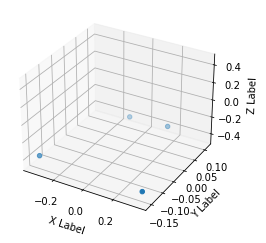

Time diff:  269.0
Footstep timestamp:  900858.0
Height check index:  13467
Height check timestamp:  900958.0

FL moving: 0.08755000000000002. FR moving: 0.01101599999999997
RL moving: 0.005907999999999969. RR moving: 0.08507899999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387805. FR later: -0.398821
RR moving: -0.40228. RL moving: -0.31473

Coord FR: [0.358, -0.155, -0.388]. Coord FL: [0.14, 0.111, -0.402]. Coord RR: [-0.356, -0.139, -0.406]. Coord RL: [-0.124, 0.109, -0.413]

FR step_size: 0.43749299999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.44451299999999994.


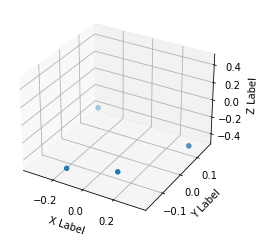

Time diff:  263.0
Footstep timestamp:  901127.0
Height check index:  13601
Height check timestamp:  901228.0

FL moving: 0.005209000000000019. FR moving: 0.090754
RL moving: 0.090053. RR moving: 0.007460999999999995

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396243. FR later: -0.305489
RR moving: -0.396175. RL moving: -0.401384

Coord FR: [0.133, -0.115, -0.396]. Coord FL: [0.353, 0.094, -0.396]. Coord RR: [-0.137, -0.167, -0.397]. Coord RL: [-0.349, 0.159, -0.419]

FR step_size: 0.43898499999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.449276.


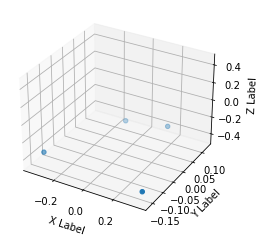

Time diff:  271.0
Footstep timestamp:  901390.0
Height check index:  13731
Height check timestamp:  901489.0

FL moving: 0.083181. FR moving: 0.010456999999999994
RL moving: 0.007358000000000031. RR moving: 0.08415499999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388752. FR later: -0.399209
RR moving: -0.400579. RL moving: -0.317398

Coord FR: [0.358, -0.161, -0.389]. Coord FL: [0.139, 0.126, -0.401]. Coord RR: [-0.36, -0.125, -0.407]. Coord RL: [-0.123, 0.101, -0.41]

FR step_size: 0.450314. FL step_size: 0. RR step size: 0. RL step_size: 0.45594199999999996.


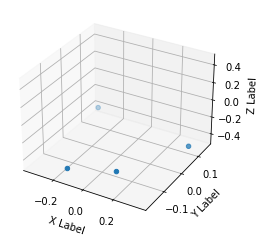

Time diff:  267.0
Footstep timestamp:  901661.0
Height check index:  13866
Height check timestamp:  901760.0

FL moving: 0.005319999999999991. FR moving: 0.086395
RL moving: 0.087723. RR moving: 0.007965999999999973

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397325. FR later: -0.31093
RR moving: -0.397697. RL moving: -0.403017

Coord FR: [0.125, -0.123, -0.397]. Coord FL: [0.356, 0.086, -0.398]. Coord RR: [-0.135, -0.175, -0.397]. Coord RL: [-0.354, 0.153, -0.417]

FR step_size: 0.44773799999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.44767199999999996.


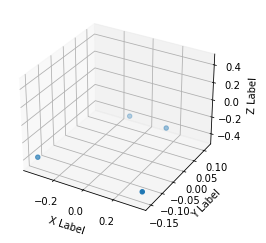

Time diff:  265.0
Footstep timestamp:  901928.0
Height check index:  13999
Height check timestamp:  902027.0

FL moving: 0.09070099999999998. FR moving: 0.010160999999999976
RL moving: 0.005348000000000019. RR moving: 0.08956599999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.39033. FR later: -0.400491
RR moving: -0.401895. RL moving: -0.311194

Coord FR: [0.357, -0.153, -0.39]. Coord FL: [0.14, 0.106, -0.402]. Coord RR: [-0.358, -0.144, -0.406]. Coord RL: [-0.129, 0.114, -0.41]

FR step_size: 0.43867199999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.451465.


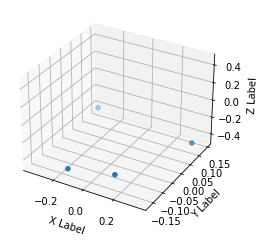

Time diff:  267.0
Footstep timestamp:  902193.0
Height check index:  14131
Height check timestamp:  902292.0

FL moving: 0.005911. FR moving: 0.084752
RL moving: 0.08491300000000002. RR moving: 0.008326

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396857. FR later: -0.312105
RR moving: -0.39704. RL moving: -0.402951

Coord FR: [0.133, -0.13, -0.397]. Coord FL: [0.355, 0.101, -0.397]. Coord RR: [-0.132, -0.165, -0.398]. Coord RL: [-0.354, 0.146, -0.417]

FR step_size: 0.44165699999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.45184499999999994.


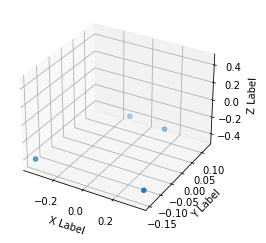

Time diff:  268.0
Footstep timestamp:  902460.0
Height check index:  14264
Height check timestamp:  902559.0

FL moving: 0.08861400000000003. FR moving: 0.00922400000000001
RL moving: 0.005419000000000007. RR moving: 0.087335

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.391168. FR later: -0.400392
RR moving: -0.402733. RL moving: -0.314119

Coord FR: [0.358, -0.14, -0.391]. Coord FL: [0.138, 0.111, -0.403]. Coord RR: [-0.356, -0.147, -0.405]. Coord RL: [-0.126, 0.125, -0.412]

FR step_size: 0.43468599999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.439627.


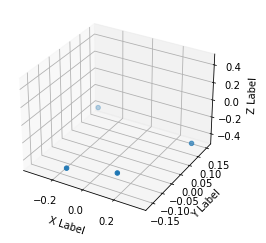

Time diff:  263.0
Footstep timestamp:  902728.0
Height check index:  14398
Height check timestamp:  902828.0

FL moving: 0.003039000000000014. FR moving: 0.09040199999999998
RL moving: 0.09002399999999999. RR moving: 0.008695999999999982

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396017. FR later: -0.305615
RR moving: -0.399059. RL moving: -0.402098

Coord FR: [0.136, -0.118, -0.396]. Coord FL: [0.35, 0.105, -0.399]. Coord RR: [-0.136, -0.163, -0.396]. Coord RL: [-0.345, 0.152, -0.417]

FR step_size: 0.431057. FL step_size: 0. RR step size: 0. RL step_size: 0.43631499999999995.


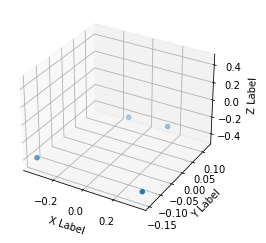

Time diff:  271.0
Footstep timestamp:  902991.0
Height check index:  14529
Height check timestamp:  903091.0

FL moving: 0.08655400000000002. FR moving: 0.011156
RL moving: 0.006002000000000007. RR moving: 0.08552799999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389231. FR later: -0.400387
RR moving: -0.402774. RL moving: -0.31622

Coord FR: [0.356, -0.146, -0.389]. Coord FL: [0.139, 0.121, -0.403]. Coord RR: [-0.354, -0.14, -0.405]. Coord RL: [-0.126, 0.116, -0.411]

FR step_size: 0.4386. FL step_size: 0. RR step size: 0. RL step_size: 0.436268.


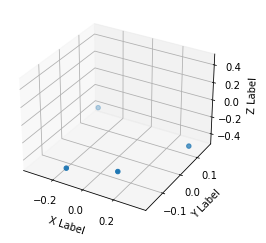

Time diff:  263.0
Footstep timestamp:  903262.0
Height check index:  14664
Height check timestamp:  903362.0

FL moving: 0.005201000000000011. FR moving: 0.088733
RL moving: 0.08910399999999996. RR moving: 0.007213999999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397503. FR later: -0.30877
RR moving: -0.399118. RL moving: -0.404319

Coord FR: [0.131, -0.113, -0.398]. Coord FL: [0.353, 0.094, -0.399]. Coord RR: [-0.139, -0.167, -0.397]. Coord RL: [-0.348, 0.159, -0.418]

FR step_size: 0.43642899999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.44490199999999996.


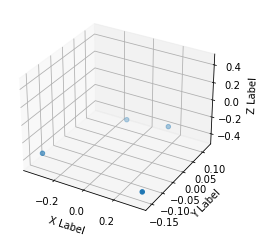

Time diff:  45986.0


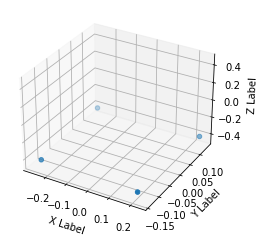

Time diff:  259.0
Footstep timestamp:  949511.0
Height check index:  14882
Height check timestamp:  949611.0

FL moving: 0.095493. FR moving: 0.0006959999999999744
RL moving: 0.0010359999999999814. RR moving: 0.09746600000000005

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.410341. FR later: -0.411037
RR moving: -0.411925. RL moving: -0.316432

Coord FR: [0.211, -0.139, -0.41]. Coord FL: [0.232, 0.135, -0.412]. Coord RR: [-0.25, -0.133, -0.413]. Coord RL: [-0.271, 0.132, -0.415]

FR step_size: 0.09079499999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.090441.


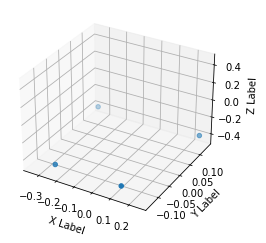

Time diff:  267.0
Footstep timestamp:  949770.0
Height check index:  15011
Height check timestamp:  949870.0

FL moving: 0.0018639999999999768. FR moving: 0.08262199999999997
RL moving: 0.07766300000000004. RR moving: 0.00017399999999995197

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399605. FR later: -0.316983
RR moving: -0.399005. RL moving: -0.397141

Coord FR: [0.134, -0.136, -0.4]. Coord FL: [0.246, 0.134, -0.399]. Coord RR: [-0.233, -0.135, -0.399]. Coord RL: [-0.345, 0.135, -0.407]

FR step_size: 0.3527936. FL step_size: 0. RR step size: 0. RL step_size: 0.36202999999999996.


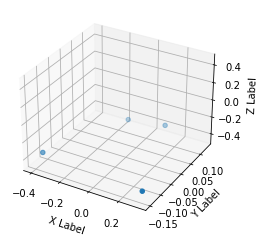

Time diff:  273.0
Footstep timestamp:  950037.0
Height check index:  15144
Height check timestamp:  950137.0

FL moving: 0.07741600000000004. FR moving: 0.010398000000000018
RL moving: 0.013976000000000044. RR moving: 0.075911

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.38339. FR later: -0.393788
RR moving: -0.397946. RL moving: -0.32053

Coord FR: [0.325, -0.149, -0.383]. Coord FL: [0.085, 0.135, -0.398]. Coord RR: [-0.402, -0.118, -0.4]. Coord RL: [-0.152, 0.116, -0.403]

FR step_size: 0.479338. FL step_size: 0. RR step size: 0. RL step_size: 0.46728800000000004.


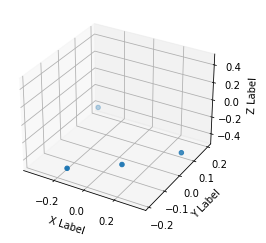

Time diff:  269.0
Footstep timestamp:  950310.0
Height check index:  15280
Height check timestamp:  950410.0

FL moving: 0.009504000000000012. FR moving: 0.08746699999999996
RL moving: 0.08422900000000005. RR moving: 0.008452999999999988

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394605. FR later: -0.307138
RR moving: -0.388868. RL moving: -0.398372

Coord FR: [0.11, -0.087, -0.395]. Coord FL: [0.35, 0.065, -0.389]. Coord RR: [-0.143, -0.191, -0.396]. Coord RL: [-0.36, 0.194, -0.415]

FR step_size: 0.453476. FL step_size: 0. RR step size: 0. RL step_size: 0.440975.


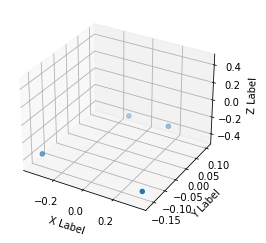

Time diff:  261.0
Footstep timestamp:  950579.0
Height check index:  15414
Height check timestamp:  950679.0

FL moving: 0.08754200000000001. FR moving: 0.009954000000000018
RL moving: 0.009291999999999967. RR moving: 0.08881300000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.38638. FR later: -0.396334
RR moving: -0.396638. RL moving: -0.309096

Coord FR: [0.358, -0.165, -0.386]. Coord FL: [0.145, 0.103, -0.397]. Coord RR: [-0.356, -0.138, -0.411]. Coord RL: [-0.132, 0.102, -0.408]

FR step_size: 0.432957. FL step_size: 0. RR step size: 0. RL step_size: 0.461351.


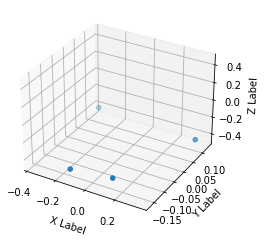

Time diff:  271.0
Footstep timestamp:  950840.0
Height check index:  15544
Height check timestamp:  950940.0

FL moving: 0.00675199999999998. FR moving: 0.079899
RL moving: 0.08021299999999998. RR moving: 0.009577000000000002

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393033. FR later: -0.313134
RR moving: -0.39011. RL moving: -0.396862

Coord FR: [0.134, -0.149, -0.393]. Coord FL: [0.354, 0.101, -0.39]. Coord RR: [-0.129, -0.165, -0.396]. Coord RL: [-0.366, 0.129, -0.417]

FR step_size: 0.4527439999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.47265.


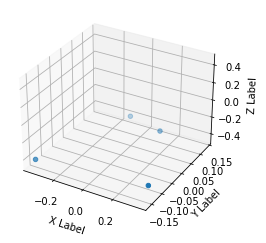

Time diff:  265.0
Footstep timestamp:  951111.0
Height check index:  15679
Height check timestamp:  951211.0

FL moving: 0.087233. FR moving: 0.01135400000000003
RL moving: 0.007510000000000017. RR moving: 0.08655299999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387912. FR later: -0.399266
RR moving: -0.398271. RL moving: -0.311038

Coord FR: [0.362, -0.128, -0.388]. Coord FL: [0.129, 0.105, -0.398]. Coord RR: [-0.359, -0.157, -0.41]. Coord RL: [-0.123, 0.136, -0.409]

FR step_size: 0.458132. FL step_size: 0. RR step size: 0. RL step_size: 0.46276799999999996.


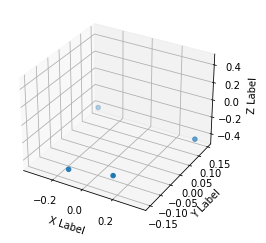

Time diff:  271.0
Footstep timestamp:  951376.0
Height check index:  15811
Height check timestamp:  951476.0

FL moving: 0.006222000000000005. FR moving: 0.085038
RL moving: 0.08505000000000001. RR moving: 0.008174000000000015

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395275. FR later: -0.310237
RR moving: -0.388074. RL moving: -0.394296

Coord FR: [0.135, -0.123, -0.395]. Coord FL: [0.36, 0.119, -0.388]. Coord RR: [-0.122, -0.15, -0.402]. Coord RL: [-0.349, 0.145, -0.416]

FR step_size: 0.446373. FL step_size: 0. RR step size: 0. RL step_size: 0.45102699999999996.


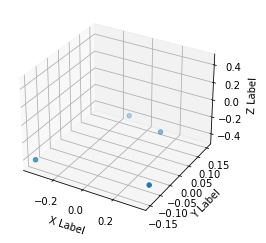

Time diff:  263.0
Footstep timestamp:  951647.0
Height check index:  15946
Height check timestamp:  951747.0

FL moving: 0.08970099999999998. FR moving: 0.008081000000000005
RL moving: 0.00936999999999999. RR moving: 0.09111799999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.392154. FR later: -0.400235
RR moving: -0.396325. RL moving: -0.306624

Coord FR: [0.358, -0.116, -0.392]. Coord FL: [0.137, 0.115, -0.396]. Coord RR: [-0.353, -0.15, -0.414]. Coord RL: [-0.129, 0.151, -0.407]

FR step_size: 0.439805. FL step_size: 0. RR step size: 0. RL step_size: 0.447585.


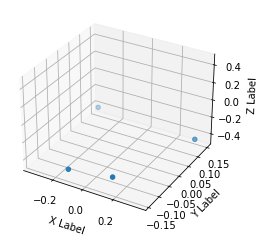

In [41]:
def visualize_absolute_foostep_sizes(dataset, footsteps):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
        
            print("Time diff: ", time_diff)

            if time_diff < 300:
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(motion_06_cmds[:, 0] - (motion_06_cmds[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(motion_06_cmds[footstep, 34] - motion_06_cmds[idx_height_check, 34])
                fl_moving = np.abs(motion_06_cmds[footstep, 37] - motion_06_cmds[idx_height_check, 37])
                rr_moving = np.abs(motion_06_cmds[footstep, 40] - motion_06_cmds[idx_height_check, 40])
                rl_moving = np.abs(motion_06_cmds[footstep, 43] - motion_06_cmds[idx_height_check, 43])
                
                print("Footstep timestamp: ", motion_06_cmds[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", motion_06_cmds[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > 0.06}. FR moving: {fr_moving > 0.06}')
                print(f'RL moving: {rl_moving > 0.06}. RR moving: {rr_moving > 0.06}')
                
                print(f'\nFR before: {motion_06_cmds[footstep, 34]}. FR later: {motion_06_cmds[idx_height_check, 34]}')
                print(f'RR moving: {motion_06_cmds[footstep, 37]}. RL moving: {motion_06_cmds[idx_height_check, 37]}')

                assert (fr_moving > 0.06) == (rl_moving > 0.06)
                assert (rr_moving > 0.06) == (fl_moving > 0.06)
                assert (fr_moving > 0.06) != (fl_moving > 0.06)
                
                # Compute front feet movements
                fr_movement = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fl_movement = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                rr_movement = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rl_movement = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                
                print(f'\nCoord FR: {[xs[0], ys[0], zs[0]]}. Coord FL: {[xs[1], ys[1], zs[1]]}. Coord RR: {[xs[2], ys[2], zs[2]]}. Coord RL: {[xs[3], ys[3], zs[3]]}')
                
                if fr_moving:
                    print(f'\nFR step_size: {fr_movement + fl_movement}. FL step_size: {0}. RR step size: {0}. RL step_size: {rl_movement + rr_movement}.')
                elif fl_moving:
                    print(f'\nFR step_size: {0}. FL step_size: {fl_movement + fr_movement}. RR step size: {rl_movement + rr_movement}. RL step_size: {0}.')
                else:
                    print("\nERROR")

cmds = get_specific_cmd(motion_06, velocity, 0, 0)
motion_06_cmds = motion_06[cmds]
visualize_absolute_foostep_sizes(motion_06_fwd, footsteps_06_fwd)

### Forward motion

RuntimeError: Requested MovieWriter (ffmpeg) not available

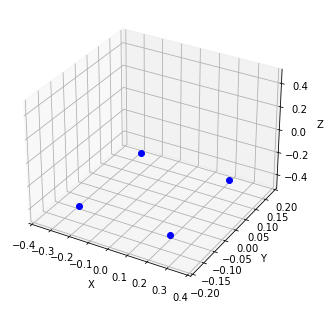

In [42]:
anim = visualize_animated_footsteps(motion_06_fwd, footsteps_06_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_06_bwd, footsteps_06_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_06_side_right, footsteps_06_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_06_side_left, footsteps_06_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_06_clock, footsteps_06_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_06_count, footsteps_06_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [45]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                labels.append(dataset[footsteps[idx], 32:44])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_06_fwd_3D, Y_motion_06_fwd_3D = create_timestamp_consistent_dataset(motion_06_fwd, footsteps_06_fwd)
X_motion_06_bwd_3D, Y_motion_06_bwd_3D = create_timestamp_consistent_dataset(motion_06_bwd, footsteps_06_bwd)
X_motion_06_clock_3D, Y_motion_06_clock_3D = create_timestamp_consistent_dataset(motion_06_clock, footsteps_06_clock)
X_motion_06_count_3D, Y_motion_06_count_3D = create_timestamp_consistent_dataset(motion_06_count, footsteps_06_count)
X_motion_06_side_left_3D, Y_motion_06_side_left_3D = create_timestamp_consistent_dataset(motion_06_side_left, footsteps_06_side_left)
X_motion_06_side_right_3D, Y_motion_06_side_right_3D = create_timestamp_consistent_dataset(motion_06_side_right, footsteps_06_side_right)

# Stack datasets
X_motion_06_3D = np.concatenate((X_motion_06_fwd_3D, X_motion_06_bwd_3D, X_motion_06_side_right_3D, X_motion_06_side_left_3D, X_motion_06_clock_3D, X_motion_06_count_3D))
Y_motion_06_3D = np.concatenate((Y_motion_06_fwd_3D, Y_motion_06_bwd_3D, Y_motion_06_side_right_3D, Y_motion_06_side_left_3D, Y_motion_06_clock_3D, Y_motion_06_count_3D))

In [49]:
%store X_motion_06_3D
%store Y_motion_06_3D

Stored 'X_motion_06_3D' (ndarray)
Stored 'Y_motion_06_3D' (ndarray)


In [46]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.04):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 300:
                # Input (command, state, x/y/z position for each foot)
                #inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34]) > threshold
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37]) > threshold
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40]) > threshold
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43]) > threshold

                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                label = []
                                
                if fr_moving:
                    label.append([fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, 0, 0, 0, 0, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y])
                elif fl_moving:
                    label.append([0, 0, fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y, 0, 0])
                else:
                    print("\nERROR")
                    
                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + [int(fr_moving), int(fl_moving), int(rr_moving), int(rl_moving)])
                
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_06_fwd_step, Y_motion_06_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_06_fwd, footsteps_06_fwd)
X_motion_06_bwd_step, Y_motion_06_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_06_bwd, footsteps_06_bwd)
X_motion_06_clock_step, Y_motion_06_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_06_clock, footsteps_06_clock)
X_motion_06_count_step, Y_motion_06_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_06_count, footsteps_06_count)
X_motion_06_side_left_step, Y_motion_06_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_06_side_left, footsteps_06_side_left)
X_motion_06_side_right_step, Y_motion_06_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_06_side_right, footsteps_06_side_right)

# Stack datasets
X_motion_06_step = np.concatenate((X_motion_06_fwd_step, X_motion_06_bwd_step, X_motion_06_side_right_step, X_motion_06_side_left_step, X_motion_06_clock_step, X_motion_06_count_step))
Y_motion_06_step = np.concatenate((Y_motion_06_fwd_step, Y_motion_06_bwd_step, Y_motion_06_side_right_step, Y_motion_06_side_left_step, Y_motion_06_clock_step, Y_motion_06_count_step))

In [47]:
%store X_motion_06_step
%store Y_motion_06_step

Stored 'X_motion_06_step' (ndarray)
Stored 'Y_motion_06_step' (ndarray)


In [48]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.mean(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.mean(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.mean(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.mean(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_06_fwd_step, "forward")
labels_stats(Y_motion_06_bwd_step, "backward")
labels_stats(Y_motion_06_clock_step, "clockwise")
labels_stats(Y_motion_06_count_step, "counter clockwise")
labels_stats(Y_motion_06_side_left_step, "left step")
labels_stats(Y_motion_06_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.4061724137931034. FR std x step: 0.10801327152349421. FR mean y step: 0.04593103448275862. FR std y step: 0.04593103448275862
FL mean x step: 0.4071929824561404. FL std x step: 0.10844700194775247. FL mean y step: 0.04170175438596491. FL std y step: 0.04170175438596491
RR mean x step: 0.4112631578947368. RR std x step: 0.1071802099950784. RR mean y step: 0.05324561403508772. RR std y step: 0.05324561403508772
RL mean x step: 0.41218965517241374. RL std x step: 0.1074417976998921. RL mean y step: 0.05594827586206897. RL std y step: 0.05594827586206897

Statistics for backward motion

FR mean x step: 0.17923511627906974. FR std x step: 0.03914974633985323. FR mean y step: 0.042263488372093025. FR std y step: 0.042263488372093025
FL mean x step: 0.1803287380952381. FL std x step: 0.034393466375696534. FL mean y step: 0.043329571428571426. FL std y step: 0.043329571428571426
RR mean x step: 0.18528002380952382. RR std x step: 0.0347565201347